# Packages

In [3085]:
import numpy as np
import sklearn as sk
import matplotlib as mp
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split

# Imports

In [3086]:
loan_data_backup = pd.read_csv('/Users/shankar/Desktop/Lending_club_data.csv')

/Users/shankar/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3087]:
loan_data=loan_data_backup.copy()

# Explore Data

In [3088]:
loan_data

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  \
0                0  1077501    1296599       5000         5000   
1                1  1077430    1314167       2500         2500   
2                2  1077175    1313524       2400         2400   
3                3  1076863    1277178      10000        10000   
4                4  1075358    1311748       3000         3000   
5                5  1075269    1311441       5000         5000   
6                6  1069639    1304742       7000         7000   
7                7  1072053    1288686       3000         3000   
8                8  1071795    1306957       5600         5600   
9                9  1071570    1306721       5375         5375   
10              10  1070078    1305201       6500         6500   
11              11  1069908    1305008      12000        12000   
12              12  1064687    1298717       9000         9000   
13              13  1069866    1304956       3000         3000   
14              14  1069057    1303503      10000        10000   
15              15  1069759    1304871       1000         1000   
16              16  1065775    1299699      10000        10000   
17              17  1069971    1304884       3600         3600   
18              18  1062474    1294539       6000         6000   
19              19  1069742    1304855       9200         9200   
20              20  1069740    1284848      20250        20250   
21              21  1039153    1269083      21000        21000   
22              22  1069710    1304821      10000        10000   
23              23  1069700    1304810      10000        10000   
24              24  1069559    1304634       6000         6000   
25              25  1069697    1273773      15000        15000   
26              26  1069800    1304679      15000        15000   
27              27  1069657    1304764       5000         5000   
28              28  1069799    1304678       4000         4000   
29              29  1047704    1278806       8500         8500   
30              30  1032111    1261745       4375         4375   
31              31  1069539    1304608      31825        31825   
32              32  1065420    1299514      10000        10000   
33              33  1069591    1304289       5000         5000   
34              34  1069530    1291365       7000         7000   
35              35  1069522    1304589      12400        12400   
36              36  1069361    1304255      10800        10800   
37              37  1069357    1304251      15000        15000   
38              38  1069356    1304250       6000         6000   
39              39  1069346    1304237      12500        12500   
40              40  1067573    1301955       9600         9600   
41              41  1069506    1304567      12000        12000   
42              42  1069314    1304202       3000         3000   
43              43  1060578    1292332       4400         4400   
44              44  1069469    1304526       6000         6000   
45              45  1051117    1282787      14000        14000   
46              46  1069465    1304521       5000         5000   
47              47  1069283    1304166      10000        10000   
48              48  1069287    1304171      10000        10000   
49              49  1069453    1303701      11000        11000   
...            ...      ...        ...        ...          ...   
466235      466235  9817407   11669318      20000        20000   
466236      466236  9797352   11649301      26000        26000   
466237      466237  9797206   11649162      15000        15000   
466238      466238  9807230   11659136      14000        14000   
466239      466239  9787297   11639199       7200         7200   
466240      466240  9767190   11619120      32350        32350   
466241      466241  7700050    9401574       7200         7200   
466242      466242  9836827   11688785      30000        30000   
466243      466243  9755174   11607279       500

In [3089]:
pd.options.display.max_columns=None

In [3090]:
loan_data

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  \
0                0  1077501    1296599       5000         5000   
1                1  1077430    1314167       2500         2500   
2                2  1077175    1313524       2400         2400   
3                3  1076863    1277178      10000        10000   
4                4  1075358    1311748       3000         3000   
5                5  1075269    1311441       5000         5000   
6                6  1069639    1304742       7000         7000   
7                7  1072053    1288686       3000         3000   
8                8  1071795    1306957       5600         5600   
9                9  1071570    1306721       5375         5375   
10              10  1070078    1305201       6500         6500   
11              11  1069908    1305008      12000        12000   
12              12  1064687    1298717       9000         9000   
13              13  1069866    1304956       3000         3000   
14              14  1069057    1303503      10000        10000   
15              15  1069759    1304871       1000         1000   
16              16  1065775    1299699      10000        10000   
17              17  1069971    1304884       3600         3600   
18              18  1062474    1294539       6000         6000   
19              19  1069742    1304855       9200         9200   
20              20  1069740    1284848      20250        20250   
21              21  1039153    1269083      21000        21000   
22              22  1069710    1304821      10000        10000   
23              23  1069700    1304810      10000        10000   
24              24  1069559    1304634       6000         6000   
25              25  1069697    1273773      15000        15000   
26              26  1069800    1304679      15000        15000   
27              27  1069657    1304764       5000         5000   
28              28  1069799    1304678       4000         4000   
29              29  1047704    1278806       8500         8500   
30              30  1032111    1261745       4375         4375   
31              31  1069539    1304608      31825        31825   
32              32  1065420    1299514      10000        10000   
33              33  1069591    1304289       5000         5000   
34              34  1069530    1291365       7000         7000   
35              35  1069522    1304589      12400        12400   
36              36  1069361    1304255      10800        10800   
37              37  1069357    1304251      15000        15000   
38              38  1069356    1304250       6000         6000   
39              39  1069346    1304237      12500        12500   
40              40  1067573    1301955       9600         9600   
41              41  1069506    1304567      12000        12000   
42              42  1069314    1304202       3000         3000   
43              43  1060578    1292332       4400         4400   
44              44  1069469    1304526       6000         6000   
45              45  1051117    1282787      14000        14000   
46              46  1069465    1304521       5000         5000   
47              47  1069283    1304166      10000        10000   
48              48  1069287    1304171      10000        10000   
49              49  1069453    1303701      11000        11000   
...            ...      ...        ...        ...          ...   
466235      466235  9817407   11669318      20000        20000   
466236      466236  9797352   11649301      26000        26000   
466237      466237  9797206   11649162      15000        15000   
466238      466238  9807230   11659136      14000        14000   
466239      466239  9787297   11639199       7200         7200   
466240      466240  9767190   11619120      32350        32350   
466241      466241  7700050    9401574       7200         7200   
466242      466242  9836827   11688785      30000        30000   
466243      466243  9755174   11607279       500

In [3091]:
loan_data.head()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.65       162.87     B        B2   
1   60 months     15.27        59.83     C        C4   
2   36 months     15.96        84.33     C        C5   
3   36 months     13.49       339.31     C        C1   
4   60 months     12.69        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT     30000.0   
2                       NaN  10+ years           RENT     12252.0   
3       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan  \
0            Verified  Dec-11   Fully Paid          n   
1     Source Verified  Dec-11  Charged Off          n   
2        Not Verified  Dec-11   Fully Paid          n   
3     Source Verified  Dec-11   Fully Paid          n   
4     Source Verified  Dec-11      Current          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_

In [3092]:
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [3093]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

# Pre - processing few continous variables

In [3094]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [3095]:
loan_data['emp_lenght_int']=loan_data['emp_length'].str.replace('\+ years','').str.replace('\ years','').str.replace('\ year','')
loan_data['emp_lenght_int']=loan_data['emp_lenght_int'].str.replace('< 1',str(0))
loan_data['emp_lenght_int'].unique()

array(['10', '0', '1', '3', '8', '9', '4', '5', '6', '2', '7', nan],
      dtype=object)

In [3096]:
type(loan_data['emp_lenght_int'][0])

str

In [3097]:
loan_data['emp_lenght_int']=pd.to_numeric(loan_data['emp_lenght_int'])

In [3098]:
type(loan_data['emp_lenght_int'][0])

numpy.float64

In [3099]:
loan_data['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
5         Nov-04
6         Jul-05
7         Jan-07
8         Apr-04
9         Sep-04
10        Jan-98
11        Oct-89
12        Apr-04
13        Jul-03
14        May-91
15        Sep-07
16        Oct-98
17        Aug-93
18        Oct-03
19        Jan-01
20        Nov-97
21        Feb-83
22        Jul-85
23        Apr-03
24        Jun-01
25        Feb-02
26        Oct-03
27        Oct-03
28        Aug-84
29        Nov-06
30        Dec-87
31        Nov-81
32        Feb-97
33        Apr-05
34        Oct-07
35        Jul-05
36        Dec-00
37        Nov-04
38        Apr-07
39        Dec-01
40        Jan-03
41        Mar-94
42        Sep-98
43        Jun-04
44        Nov-95
45        Jul-99
46        Jun-95
47        Nov-06
48        Sep-92
49        Jan-02
           ...  
466235    Dec-92
466236    Aug-96
466237    Oct-00
466238    May-94
466239    Jul-93
466240    Nov-92
466241    Feb-01
466242    Mar-

In [3100]:
loan_data['earliest_cr_line_date']=pd.to_datetime(loan_data['earliest_cr_line'],format='%b-%y')

In [3101]:
type(loan_data['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [3102]:
pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']

0        12022 days
1         6819 days
2         5874 days
3         7974 days
4         8005 days
5         4778 days
6         4536 days
7         3987 days
8         4992 days
9         4839 days
10        7274 days
11       10288 days
12        4992 days
13        5267 days
14        9711 days
15        3744 days
16        7001 days
17        8888 days
18        5175 days
19        6178 days
20        7335 days
21       12722 days
22       11841 days
23        5358 days
24        6027 days
25        5782 days
26        5175 days
27        5175 days
28       12175 days
29        4048 days
30       10958 days
31       13179 days
32        7608 days
33        4627 days
34        3714 days
35        4536 days
36        6209 days
37        4778 days
38        3897 days
39        5844 days
40        5448 days
41        8676 days
42        7031 days
43        4931 days
44        8066 days
45        6728 days
46        8219 days
47        4048 days
48        9222 days
49        5813 days


In [3103]:
loan_data['mnths_since_earliest_cr_line']=round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date'])/np.timedelta64(1,'M')))
loan_data['mnths_since_earliest_cr_line'].head()

0    395.0
1    224.0
2    193.0
3    262.0
4    263.0
Name: mnths_since_earliest_cr_line, dtype: float64

In [3104]:
loan_data['mnths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mnths_since_earliest_cr_line, dtype: float64

In [3105]:
loan_data.loc[:,['earliest_cr_line','earliest_cr_line_date','mnths_since_earliest_cr_line']][loan_data['mnths_since_earliest_cr_line']<0]

earliest_cr_line earliest_cr_line_date  mnths_since_earliest_cr_line
1580             Sep-62            2062-09-01                        -537.0
1770             Sep-68            2068-09-01                        -609.0
2799             Sep-64            2064-09-01                        -561.0
3282             Sep-67            2067-09-01                        -597.0
3359             Feb-65            2065-02-01                        -566.0
3413             Jun-67            2067-06-01                        -594.0
3607             Aug-67            2067-08-01                        -596.0
3989             Dec-63            2063-12-01                        -552.0
4440             Sep-68            2068-09-01                        -609.0
4449             Sep-68            2068-09-01                        -609.0
4492             Mar-63            2063-03-01                        -543.0
5109             Aug-68            2068-08-01                        -608.0
5417             Nov-65            2065-11-01                        -575.0
5692             May-65            2065-05-01                        -569.0
6137             Oct-54            2054-10-01                        -442.0
6435             Jun-68            2068-06-01                        -606.0
7445             Oct-65            2065-10-01                        -574.0
7481             Apr-66            2066-04-01                        -580.0
7583             Sep-68            2068-09-01                        -609.0
7667             Mar-68            2068-03-01                        -603.0
7893             Sep-62            2062-09-01                        -537.0
8310             Sep-65            2065-09-01                        -573.0
8484             Apr-67            2067-04-01                        -592.0
8806             Oct-63            2063-10-01                        -550.0
8908             Apr-67            2067-04-01                        -592.0
9164             Oct-63            2063-10-01                        -550.0
10344            Oct-64            2064-10-01                        -562.0
10907            May-63            2063-05-01                        -545.0
11288            Jul-67            2067-07-01                        -595.0
11336            Sep-62            2062-09-01                        -537.0
12059            Nov-66            2066-11-01                        -587.0
12200            Mar-68            2068-03-01                        -603.0
12907            May-65            2065-05-01                        -569.0
13048            Feb-68            2068-02-01                        -602.0
13128            Jul-64            2064-07-01                        -559.0
13226            Nov-67            2067-11-01                        -599.0
13489            Apr-64            2064-04-01                        -556.0
13997            Jun-59            2059-06-01                        -498.0
14015            Sep-56            2056-09-01                        -465.0
14074            Jun-66            2066-06-01                        -582.0
14118            Jan-46            2046-01-01                        -337.0
14244            Mar-66            2066-03-01                        -579.0
14276            Jan-63            2063-01-01                        -541.0
15315            Dec-50            2050-12-01                        -396.0
15439            Mar-66            2066-03-01                        -579.0
15527            Jan-68            2068-01-01                        -601.0
16991            Feb-68            2068-02-01                        -602.0
17618            Feb-66            2066-02-01                        -578.0
18818            Sep-64            2064-09-01                        -561.0
18846            Oct-65            2065-10-01                        -574.0
...                 ...                   ...                           ...
452626           May-67            2067-05-01          

In [3106]:
loan_data['mnths_since_earliest_cr_line'][loan_data['mnths_since_earliest_cr_line']<0]=loan_data['mnths_since_earliest_cr_line'].max()

<ipython-input-3106-dc694eb4f0e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['mnths_since_earliest_cr_line'][loan_data['mnths_since_earliest_cr_line']<0]=loan_data['mnths_since_earliest_cr_line'].max()


In [3107]:
min(loan_data['mnths_since_earliest_cr_line'])

73.0

In [3108]:
loan_data['term_int']=loan_data['term'].str.replace('months','')
loan_data['term_int']=loan_data['term_int'].astype(int)

In [3109]:
loan_data['mths_since_issue_d']= pd.to_datetime(loan_data['issue_d'],format= '%b-%y' )
type(loan_data['mths_since_issue_d'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [3110]:
loan_data['mnths_since_issue_d']=round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['mths_since_issue_d'])/np.timedelta64(1,'M')))
loan_data['mnths_since_issue_d'].describe()


count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mnths_since_issue_d, dtype: float64

# Pre Processing discrete variables

In [3111]:
pd.get_dummies(loan_data['grade'])

A  B  C  D  E  F  G
0       0  1  0  0  0  0  0
1       0  0  1  0  0  0  0
2       0  0  1  0  0  0  0
3       0  0  1  0  0  0  0
4       0  1  0  0  0  0  0
5       1  0  0  0  0  0  0
6       0  0  1  0  0  0  0
7       0  0  0  0  1  0  0
8       0  0  0  0  0  1  0
9       0  1  0  0  0  0  0
10      0  0  1  0  0  0  0
11      0  1  0  0  0  0  0
12      0  0  1  0  0  0  0
13      0  1  0  0  0  0  0
14      0  1  0  0  0  0  0
15      0  0  0  1  0  0  0
16      0  0  1  0  0  0  0
17      1  0  0  0  0  0  0
18      0  1  0  0  0  0  0
19      1  0  0  0  0  0  0
20      0  0  1  0  0  0  0
21      0  1  0  0  0  0  0
22      0  1  0  0  0  0  0
23      0  1  0  0  0  0  0
24      0  1  0  0  0  0  0
25      0  1  0  0  0  0  0
26      0  0  1  0  0  0  0
27      0  0  0  1  0  0  0
28      0  1  0  0  0  0  0
29      0  1  0  0  0  0  0
30      1  0  0  0  0  0  0
31      1  0  0  0  0  0  0
32      0  0  1  0  0  0  0
33      1  0  0  0  0  0  0
34      0  0  1  0  0  0  0
35      0  1  0  0  0  0  0
36      0  1  0  0  0  0  0
37      1  0  0  0  0  0  0
38      0  1  0  0  0  0  0
39      0  1  0  0  0  0  0
40      1  0  0  0  0  0  0
41      1  0  0  0  0  0  0
42      0  0  0  1  0  0  0
43      0  0  0  1  0  0  0
44      1  0  0  0  0  0  0
45      0  1  0  0  0  0  0
46      1  0  0  0  0  0  0
47      0  1  0  0  0  0  0
48      1  0  0  0  0  0  0
49      1  0  0  0  0  0  0
...    .. .. .. .. .. .. ..
466235  1  0  0  0  0  0  0
466236  0  0  0  1  0  0  0
466237  1  0  0  0  0  0  0
466238  0  1  0  0  0  0  0
466239  0  0  1  0  0  0  0
466240  0  0  0  1  0  0  0
466241  0  0  1  0  0  0  0
466242  0  0  1  0  0  0  0
466243  0  0  0  1  0  0  0
466244  0  0  1  0  0  0  0
466245  0  1  0  0  0  0  0
466246  0  0  0  1  0  0  0
466247  0  1  0  0  0  0  0
466248  0  0  0  1  0  0  0
466249  0  1  0  0  0  0  0
466250  0  1  0  0  0  0  0
466251  0  0  0  1  0  0  0
466252  0  1  0  0  0  0  0
466253  0  0  1  0  0  0  0
466254  0  0  0  0  1  0  0
466255  0  0  0  1  0  0  0
466256  0  0  0  1  0  0  0
466257  0  1  0  0  0  0  0
466258  0  1  0  0  0  0  0
466259  0  0  1  0  0  0  0
466260  0  0  0  0  1  0  0
466261  0  1  0  0  0  0  0
466262  0  0  1  0  0  0  0
466263  0  0  0  1  0  0  0
466264  0  0  1  0  0  0  0
466265  1  0  0  0  0  0  0
466266  1  0  0  0  0  0  0
466267  0  1  0  0  0  0  0
466268  0  0  0  0  1  0  0
466269  0  0  0  0  1  0  0
466270  1  0  0  0  0  0  0
466271  0  0  1  0  0  0  0
466272  0  0  0  0  1  0  0
466273  0  1  0  0  0  0  0
466274  0  1  0  0  0  0  0
466275  0  0  1  0  0  0  0
466276  0  0  0  1  0  0  0
466277  1  0  0  0  0  0  0
466278  0  0  0  1  0  0  0
466279  0  1  0  0  0  0  0
466280  0  0  1  0  0  0  0
466281  0  0  0  1  0  0  0
466282  0  0  0  1  0  0  0
466283  1  0  0  0  0  0  0
466284  0  0  0  1  0  0  0

[466285 rows x 7 columns]

In [3112]:
pd.get_dummies(loan_data['grade'],prefix='grade',prefix_sep=':')

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G
0             0        1        0        0        0        0        0
1             0        0        1        0        0        0        0
2             0        0        1        0        0        0        0
3             0        0        1        0        0        0        0
4             0        1        0        0        0        0        0
5             1        0        0        0        0        0        0
6             0        0        1        0        0        0        0
7             0        0        0        0        1        0        0
8             0        0        0        0        0        1        0
9             0        1        0        0        0        0        0
10            0        0        1        0        0        0        0
11            0        1        0        0        0        0        0
12            0        0        1        0        0        0        0
13            0        1        0        0        0        0        0
14            0        1        0        0        0        0        0
15            0        0        0        1        0        0        0
16            0        0        1        0        0        0        0
17            1        0        0        0        0        0        0
18            0        1        0        0        0        0        0
19            1        0        0        0        0        0        0
20            0        0        1        0        0        0        0
21            0        1        0        0        0        0        0
22            0        1        0        0        0        0        0
23            0        1        0        0        0        0        0
24            0        1        0        0        0        0        0
25            0        1        0        0        0        0        0
26            0        0        1        0        0        0        0
27            0        0        0        1        0        0        0
28            0        1        0        0        0        0        0
29            0        1        0        0        0        0        0
30            1        0        0        0        0        0        0
31            1        0        0        0        0        0        0
32            0        0        1        0        0        0        0
33            1        0        0        0        0        0        0
34            0        0        1        0        0        0        0
35            0        1        0        0        0        0        0
36            0        1        0        0        0        0        0
37            1        0        0        0        0        0        0
38            0        1        0        0        0        0        0
39            0        1        0        0        0        0        0
40            1        0        0        0        0        0        0
41            1        0        0        0        0        0        0
42            0        0        0        1        0        0        0
43            0        0        0        1        0        0        0
44            1        0        0        0        0        0        0
45            0        1        0        0        0        0        0
46            1        0        0        0        0        0        0
47            0        1        0        0        0        0        0
48            1        0        0        0        0        0        0
49            1        0        0        0        0        0        0
...         ...      ...      ...      ...      ...      ...      ...
466235        1        0        0        0        0        0        0
466236        0        0        0        1        0        0        0
466237        1        0        0        0        0        0        0
466238        0        1        0        0        0        0        0
466239        0        0        1        0        0        0        0
466240        0   

In [3113]:
loan_data_dummies=[pd.get_dummies(loan_data['grade'],prefix='grade',prefix_sep=':'),
                   pd.get_dummies(loan_data['sub_grade'],prefix='sub_grade',prefix_sep=':'),
                   pd.get_dummies(loan_data['home_ownership'],prefix='home_ownership',prefix_sep=':'),
                   pd.get_dummies(loan_data['verification_status'],prefix='verification_status',prefix_sep=':'),
                   pd.get_dummies(loan_data['loan_status'],prefix='loan_status',prefix_sep=':'),
                   pd.get_dummies(loan_data['purpose'],prefix='purpose',prefix_sep=':'),
                   pd.get_dummies(loan_data['addr_state'],prefix='addr_state',prefix_sep=':'),
                   pd.get_dummies(loan_data['initial_list_status'],prefix='initial_list_status',prefix_sep=':'),
                  ]
                

In [3114]:
loan_data_dummies=pd.concat(loan_data_dummies,axis=1)

In [3115]:
loan_data_dummies.shape

(466285, 126)

In [3116]:
loan_data=pd.concat([loan_data,loan_data_dummies],axis=1)


# Missing values

In [3117]:
loan_data.isnull()

Unnamed: 0     id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0            False  False      False      False        False            False   
1            False  False      False      False        False            False   
2            False  False      False      False        False            False   
3            False  False      False      False        False            False   
4            False  False      False      False        False            False   
5            False  False      False      False        False            False   
6            False  False      False      False        False            False   
7            False  False      False      False        False            False   
8            False  False      False      False        False            False   
9            False  False      False      False        False            False   
10           False  False      False      False        False            False   
11           False  False      False      False        False            False   
12           False  False      False      False        False            False   
13           False  False      False      False        False            False   
14           False  False      False      False        False            False   
15           False  False      False      False        False            False   
16           False  False      False      False        False            False   
17           False  False      False      False        False            False   
18           False  False      False      False        False            False   
19           False  False      False      False        False            False   
20           False  False      False      False        False            False   
21           False  False      False      False        False            False   
22           False  False      False      False        False            False   
23           False  False      False      False        False            False   
24           False  False      False      False        False            False   
25           False  False      False      False        False            False   
26           False  False      False      False        False            False   
27           False  False      False      False        False            False   
28           False  False      False      False        False            False   
29           False  False      False      False        False            False   
30           False  False      False      False        False            False   
31           False  False      False      False        False            False   
32           False  False      False      False        False            False   
33           False  False      False      False        False            False   
34           False  False      False      False        False            False   
35           False  False      False      False        False            False   
36           False  False      False      False        False            False   
37           False  False      False      False        False            False   
38           False  False      False      False        False            False   
39           False  False      False      False        False            False   
40           False  False      False      False        False            False   
41           False  False      False      False        False            False   
42           False  False      False      False        False            False   
43           False  False      False      False        False            False   
44           False  False      False      False        False            False   
45           False  False      False      False        False            False   
46           False  False      False      False        False            False   
47           False  False      False      False        False            False   
48           False  False      False   

In [3118]:
pd.options.display.max_rows=None
loan_data.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                        

In [3119]:
pd.options.display.max_rows=100

In [3120]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'],inplace=True)

In [3121]:
loan_data['total_rev_hi_lim'].isnull().sum()

0

In [3122]:
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(),inplace=True)

In [3123]:
loan_data['mnths_since_earliest_cr_line'].fillna(0,inplace=True)
loan_data['acc_now_delinq'].fillna(0,inplace=True)
loan_data['total_acc'].fillna(0,inplace=True)
loan_data['pub_rec'].fillna(0,inplace=True)
loan_data['open_acc'].fillna(0,inplace=True)
loan_data['inq_last_6mths'].fillna(0,inplace=True)
loan_data['delinq_2yrs'].fillna(0,inplace=True)
loan_data['emp_lenght_int'].fillna(0,inplace=True)

# PD Model

# Data Preperation

# Dependent variable. Good/Bad Definition Default Non - Default Accounts

In [3124]:
#Borrower Performance and repayment behaviour
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [3125]:
loan_data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [3126]:
#Proportianlity of different account categories
loan_data['loan_status'].value_counts()/loan_data['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [3127]:
loan_data['good_bad']=np.where(loan_data['loan_status'].isin(['Charged Off','Default',
                                                              'Late (31-120 days)',
                                                               'Does not meet the credit policy. Status:Charged Off'])
                                                       ,0,1)

In [3128]:
pd.options.display.min_rows=100
loan_data['good_bad'] #These are the dependent varaibles which were are trying to predict using logisitic regression

0         1
1         0
2         1
3         1
4         1
5         1
6         1
7         1
8         0
9         0
10        1
11        1
12        0
13        1
14        0
15        1
16        1
17        1
18        1
19        1
20        1
21        0
22        1
23        1
24        0
25        1
26        0
27        0
28        1
29        1
30        1
31        1
32        1
33        1
34        1
35        1
36        1
37        1
38        1
39        1
40        1
41        1
42        1
43        1
44        1
45        1
46        0
47        1
48        1
49        1
         ..
466235    1
466236    1
466237    1
466238    1
466239    1
466240    1
466241    1
466242    1
466243    1
466244    1
466245    1
466246    1
466247    1
466248    1
466249    1
466250    1
466251    0
466252    0
466253    1
466254    0
466255    1
466256    0
466257    1
466258    1
466259    1
466260    1
466261    1
466262    1
466263    1
466264    1
466265    1
466266    1
4662

# Splitting data

In [3129]:
train_test_split(loan_data.drop('good_bad',axis=1),loan_data['good_bad'])
#The output is 4 arrays


[        Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
 63925        63925   8874890   10667022      10000        10000   
 135359      135359   5384738    6736899      17400        17400   
 221746      221746   1215377    1456405      12000        12000   
 171624      171624   3155344    3867559       9000         9000   
 384959      384959  16742282   18854815       3500         3500   
 70368        70368   8606017   10358092       5125         5125   
 8796          8796    860812    1073626      20000        20000   
 337304      337304  22233255   24555980      15425        15425   
 79279        79279   7628326    9310304       8000         8000   
 103561      103561   6646693    8228844      12000        12000   
 277760      277760  30695961   33249145       6400         6400   
 177356      177356   2635857    3178123      15000        15000   
 413169      413169  13587574   15639893      10000        10000   
 177279      177279   2654777    3196928       4

In [3130]:
#train dataset with inputs #test dataset with inputs #train dataset with targets #test dataset with targets
loan_data_inputs_train,loan_data_inputs_test,loan_data_targets_train,loan_data_targets_test=train_test_split(loan_data.drop('good_bad',axis=1),loan_data['good_bad'],train_size=0.8)

In [3131]:
loan_data_inputs_train.shape

(373028, 207)

In [3132]:
loan_data_targets_train.shape

(373028,)

# Pre processing Discrete variables 

In [ ]:
#df_inputs_prepr = loan_data_inputs_train
#df_targets_prepr = loan_data_targets_train
df_inputs_prepr = loan_data_inputs_test
df_targets_prepr = loan_data_targets_test

In [3148]:
def woe_discrete(df,discrete_variable_name,good_bad_variable_df):
    df=pd.concat([df[discrete_variable_name],good_bad_variable_df],axis=1) #concats the independent variable (grade,annual_income,deliquencies,etc) with the dependent varaible good bad
    #E.G. grade	good_bad
          #B	1
    df=pd.concat([df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].mean()],axis=1) #groups the independent variable based on its variable name by using the count method. 
    #Also finds the mean on this categroy to find for each of the independent varaibles. Finally concats them all in one dataframe.
    #E.G.
    #grade     good_bad  grade   good_bad
    # A 	   59791	   A	  0.961165
    df=df.iloc[:,[0,1,3]] #Removes the duplicate categories
    df.columns=[df.columns.values[0],'no_ops','prop_good'] # renames the columns
    df['prop_n_obs']=df['no_ops']/df['no_ops'].sum() #Finds the proportion of obvs that belong to a certain category
    df['n_good']=df['prop_good']*df['no_ops']
    df['n_bad']=(1-df['prop_good'])*df['no_ops']
    df['prop_n_good']=df['n_good']/df['n_good'].sum()
    df['prop_n_bad']=df['n_bad']/df['n_bad'].sum()
    df['WoE']=np.log(df['prop_n_good']/df['prop_n_bad'])
    df=df.sort_values(['WoE'])
    df=df.reset_index(drop=True)
    df['diff_prop_good']=df['prop_good'].diff().abs()
    df['diff_WoE']=df['WoE'].diff().abs()
    df['Information Value']=(df['prop_n_good']-df['prop_n_bad'])*df['WoE']
    df['Information_Value']=df['Information Value'].sum()
    return df

In [3149]:
df_WoE=woe_discrete(df_inputs_prepr,'grade',df_targets_prepr)

In [3150]:
df_WoE

grade  no_ops  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G     677   0.716396    0.007260    485.0   192.0     0.005838   
1     F    2660   0.751504    0.028523   1999.0   661.0     0.024061   
2     E    7172   0.811629    0.076906   5821.0  1351.0     0.070065   
3     D   15180   0.848682    0.162776  12883.0  2297.0     0.155067   
4     C   25225   0.884083    0.270489  22301.0  2924.0     0.268428   
5     B   27258   0.920647    0.292289  25095.0  2163.0     0.302058   
6     A   15085   0.960955    0.161757  14496.0   589.0     0.174482   

   prop_n_bad       WoE  diff_prop_good  diff_WoE  Information Value  \
0    0.018866 -1.173020             NaN       NaN           0.015282   
1    0.064950 -0.993025        0.035108  0.179995           0.040604   
2    0.132750 -0.639047        0.060125  0.353979           0.040059   
3    0.225705 -0.375369        0.037054  0.263678           0.026515   
4    0.287315 -0.067995        0.035401  0.307374           0.001284   
5    0.212538  0.351499        0.036564  0.419493           0.031466   
6    0.057876  1.103528        0.040307  0.752029           0.128679   

   Information_Value  
0            0.28389  
1            0.28389  
2            0.28389  
3            0.28389  
4            0.28389  
5            0.28389  
6            0.28389

In [3151]:
def plot_by_WoE(df_WoE,rotation_by_x_axis_labels=0):
    x=np.array(df_WoE.iloc[:,0].apply(str)) #matplotlib only works with numpy therefore we have to put the grades in a numpy array
    y=df_WoE['WoE']
    plt.figure(figsize=(18,6))
    plt.plot(x,y,marker='o',linestyle='--',color='k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation=rotation_by_x_axis_labels)

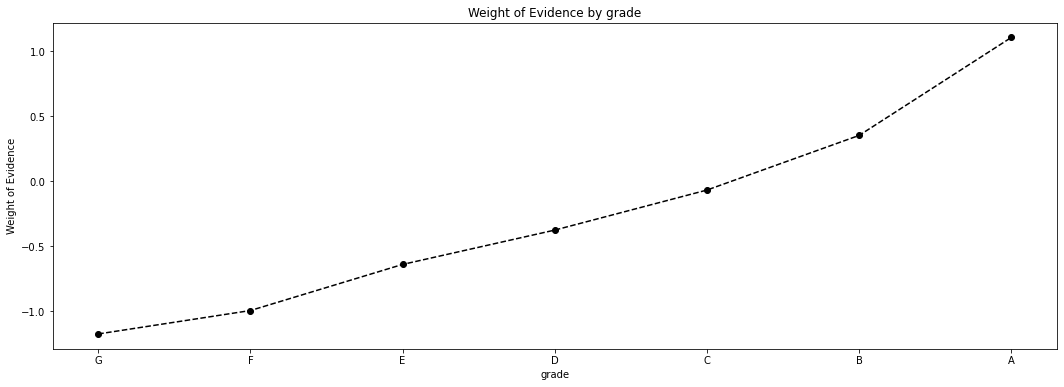

In [3152]:
plot_by_WoE(df_WoE)

# Pre - processing Discrete Variables: Creating Dummy Variables

In [3153]:
df_temp=woe_discrete(df_inputs_prepr,'home_ownership',df_targets_prepr)

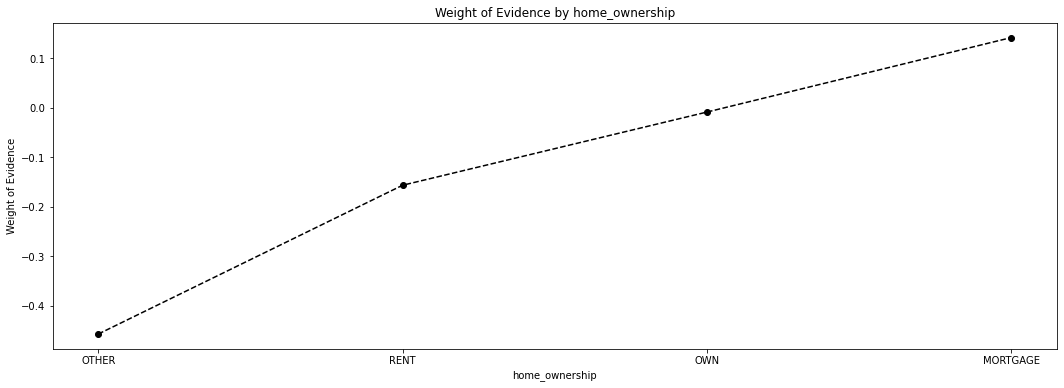

In [3154]:
plot_by_WoE(df_temp)

In [3155]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY']=sum([df_inputs_prepr['home_ownership:RENT'],df_inputs_prepr['home_ownership:OTHER'],
                                             df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr['home_ownership:ANY']])

In [3156]:
df_inputs_prepr

Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
406269      406269  14539347   16601647       6000         6000   
424213      424213  12826446   14848565       7125         7125   
9741          9741    844451    1055384       8000         8000   
5237          5237    988537    1212981       7500         7500   
104468      104468   6646726    8228876       2000         2000   
243414      243414  32409323   35022560      35000        35000   
143174      143174   3848787    4862436      20000        20000   
220073      220073   1241313    1481644       7200         7200   
295103      295103  29023950   31547150      10575        10575   
429549      429549  12626453   14688622       6600         6600   
20066        20066    663412     848304      25000        25000   
374777      374777  17815277   19947745      13000        13000   
6588          6588    966615    1187292       2100         2100   
346819      346819  21090728   23373407       5000         5000   
345265      345265  21330298   23643182      18825        18825   
278194      278194  31356782   33929985       8000         8000   
275985      275985  31577575   34170767      10200        10200   
323516      323516  23202952   25555875      28000        28000   
212264      212264   1351678    1595834      20000        20000   
35075        35075     69001     265533      15000        15000   
147007      147007   4310354    5492986       8325         8325   
459809      459809  10575254   12457355       2000         2000   
26643        26643    567109     729527       1500         1500   
237208      237208  36491003   39222788      10850        10850   
199210      199210   1519382    1782254       1500         1500   
39029        39029    292050     292040       9000         9000   
228748      228748   1104162    1340556      16000        16000   
107928      107928   6569374    8121404      15000        15000   
171492      171492   3150896    3863463      32000        32000   
443207      443207  11834809   13826960      30000        30000   
214842      214842   1327799    1572960      14900        14900   
371218      371218  18845567   21018147       6000         6000   
82526        82526   7628117    1194648      28200        28200   
190500      190500   1621205    1893176       5000         5000   
205660      205660   1443004    1695105      20000        20000   
209962      209962   1395972    1642754      30000        30000   
193391      193391   1566189    1833511       6400         6400   
334642      334642  22902598   25245555      24000        24000   
366553      366553  18925737   21178389      20000        20000   
383138      383138  17302827   19345368      20000        20000   
157721      157721   3665900    4629000       9000         9000   
40130        40130    576615     741549       2500         2500   
420577      420577  12245328   14237482      24125        24125   
163510      163510   3378873    4231649       6000         6000   
237467      237467  36341208   39072606      20000        20000   
51595        51595   9754723    4667499      16000        16000   
263086      263086  33310875   35954140       8000         8000   
38664        38664    350313     352342       7500         7500   
421711      421711  12988322   15020474       6700         6700   
227455      227455   1109059    1345488      11000        11000   
...            ...       ...        ...        ...          ...   
224056      224056   1179012    1420473      15000        15000   
437237      437237  12515429   14527574      24000        24000   
390390      390390  16261891   18364422      28000        28000   
45503        45503  10125547   11977659      12000        12000   
85965        85965   7439345    9101343      24925        24925   
87289        87289   7368529    9030532      22000        22000   
425325      425325  12936254   14968453      10000        10000   
200992      200992   1496553    1757339      24250     

In [3157]:
df_inputs_prepr['addr_state'].unique()

array(['CA', 'AL', 'TX', 'PA', 'FL', 'NM', 'AZ', 'WI', 'GA', 'IN', 'OH',
       'VA', 'NJ', 'NY', 'NV', 'OK', 'MI', 'IL', 'MS', 'OR', 'MA', 'DE',
       'UT', 'LA', 'SC', 'KY', 'SD', 'WA', 'MD', 'RI', 'MO', 'CT', 'NC',
       'CO', 'VT', 'KS', 'HI', 'MN', 'AR', 'TN', 'MT', 'WY', 'WV', 'NH',
       'DC', 'AK', 'ME', 'ID', 'IA', 'NE'], dtype=object)

In [3158]:
df_temp=woe_discrete(df_inputs_prepr,'addr_state',df_targets_prepr)
df_temp

/Users/shankar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


addr_state  no_ops  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0          NE       3   0.333333    0.000032      1.0     2.0     0.000012   
1          DE     272   0.838235    0.002917    228.0    44.0     0.002744   
2          AL    1185   0.858228    0.012707   1017.0   168.0     0.012241   
3          HI     548   0.863139    0.005876    473.0    75.0     0.005693   
4          NV    1333   0.867217    0.014294   1156.0   177.0     0.013914   
5          NM     529   0.867675    0.005672    459.0    70.0     0.005525   
6          FL    6324   0.873814    0.067813   5526.0   798.0     0.066514   
7          UT     698   0.878223    0.007485    613.0    85.0     0.007378   
8          TN    1181   0.879763    0.012664   1039.0   142.0     0.012506   
9          MD    2192   0.881843    0.023505   1933.0   259.0     0.023267   
10         NJ    3651   0.882224    0.039150   3221.0   430.0     0.038770   
11         LA    1081   0.882516    0.011592    954.0   127.0     0.011483   
12         VA    2850   0.884561    0.030561   2521.0   329.0     0.030344   
13         MO    1577   0.885225    0.016910   1396.0   181.0     0.016803   
14         OK     816   0.886029    0.008750    723.0    93.0     0.008702   
15         OR    1229   0.886086    0.013179   1089.0   140.0     0.013108   
16         PA    3296   0.886833    0.035343   2923.0   373.0     0.035183   
17         MI    2251   0.887161    0.024138   1997.0   254.0     0.024037   
18         NY    7992   0.887638    0.085699   7094.0   898.0     0.085388   
19         AK     242   0.888430    0.002595    215.0    27.0     0.002588   
20         NC    2557   0.889323    0.027419   2274.0   283.0     0.027371   
21         CA   14256   0.889450    0.152868  12680.0  1576.0     0.152624   
22         WI    1238   0.890953    0.013275   1103.0   135.0     0.013276   
23         MA    2234   0.891674    0.023955   1992.0   242.0     0.023977   
24         GA    2958   0.893171    0.031719   2642.0   316.0     0.031801   
25         IN    1302   0.894777    0.013961   1165.0   137.0     0.014023   
26         MN    1654   0.894800    0.017736   1480.0   174.0     0.017814   
27         AZ    2136   0.895131    0.022904   1912.0   224.0     0.023014   
28         AR     678   0.898230    0.007270    609.0    69.0     0.007330   
29         IL    3769   0.899443    0.040415   3390.0   379.0     0.040804   
30         OH    3018   0.900265    0.032362   2717.0   301.0     0.032703   
31         TX    7238   0.902183    0.077613   6530.0   708.0     0.078599   
32         CO    1919   0.903596    0.020578   1734.0   185.0     0.020871   
33         WA    2055   0.904623    0.022036   1859.0   196.0     0.022376   
34         KS     854   0.905152    0.009157    773.0    81.0     0.009304   
35         SD     191   0.905759    0.002048    173.0    18.0     0.002082   
36         CT    1404   0.909544    0.015055   1277.0   127.0     0.015371   
37         MT     261   0.911877    0.002799    238.0    23.0     0.002865   
38         RI     414   0.913043    0.004439    378.0    36.0     0.004550   
39         KY     866   0.914550    0.009286    792.0    74.0     0.009533   
40         SC    1130   0.918584    0.012117   1038.0    92.0     0.012494   
41         VT     175   0.920000    0.001877    161.0    14.0     0.001938   
42         WV     472   0.927966    0.005061    438.0    34.0     0.005272   
43         MS     235   0.931915    0.002520    219.0    16.0     0.002636   
44         NH     460   0.932609    0.004933    429.0    31.0     0.005164   
45         WY     239   0.933054    0.002563    223.0    16.0     0.002684   
46         DC     284   0.936620    0.003045    266.0    18.0     0.003202   
47         IA       3   1.000000    0.000032      3.0     0.0     0.000036   
48         ID       4   1.000000    0.000043      4.0     0.0     0.000048   
49         ME       3   1.000000    0.000032      3.0     0.0     0.000036   

    prop_n_bad       WoE

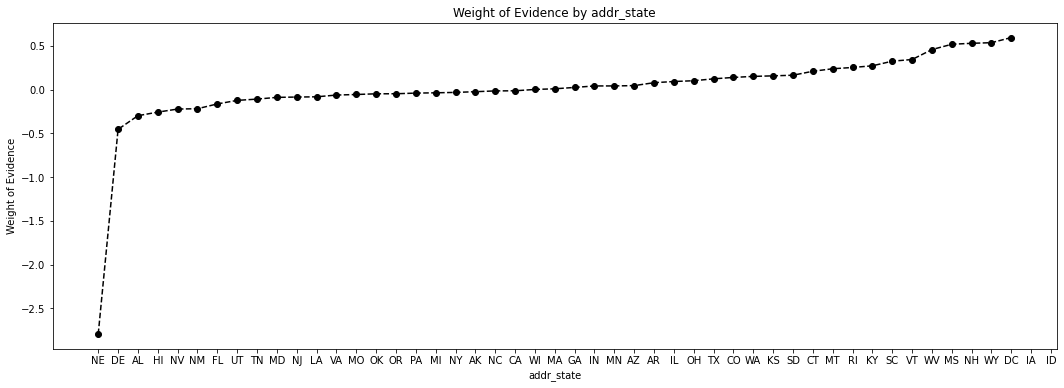

In [3159]:
plot_by_WoE(df_temp)

In [3160]:
if['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND']=0

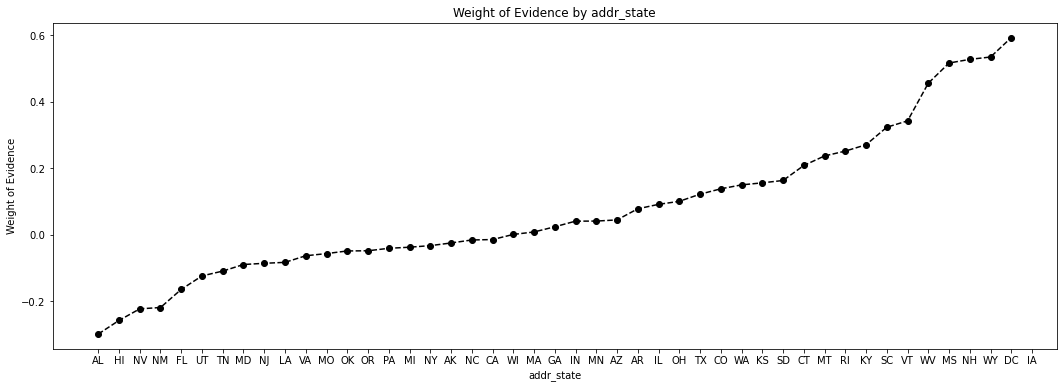

In [3161]:
plot_by_WoE(df_temp.iloc[2:-2,:])

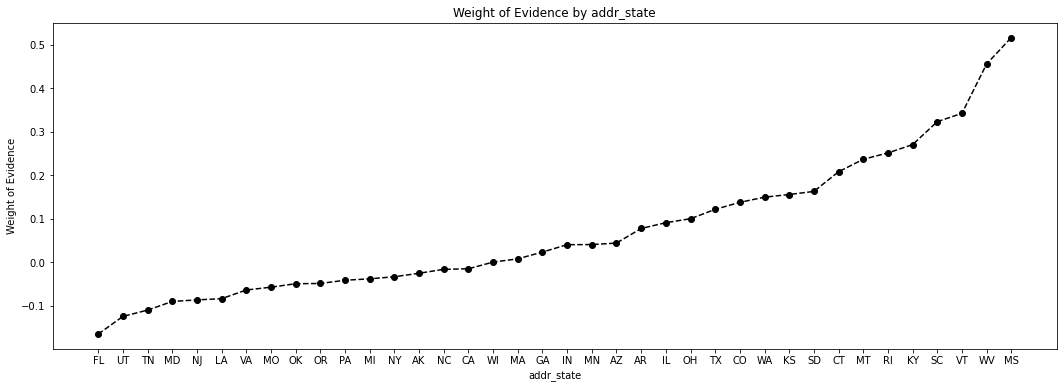

In [3162]:
plot_by_WoE(df_temp.iloc[6:-6,:])

In [3163]:
# We create the following categories:
# 'NE' 'IA' 'NV' HI' 'FL' 'AL' 'OK'
# 'NY'
# 'NJ' 'LA' 'DE' 'MD' 'MO' 'NC' 'VA' 'AR' 'NM'
# 'CA'
# 'TN' 'PA' 'UT' 'AZ' 'MI'
# 'RI' 'IN' 'OH' 'KY' 'MA' 'MN'
# 'GA' 'SD' 'WA' 'WI' 'MT'
# 'OR' 'SC' 
# 'TX'
# 'IL' 'CT' 'MS'
# 'AK' 'CO' 'NH' 'WV' 'ID'
# 'KS' 'VT' 'WY' 'DC' 'ME' 

# 'IA_NV_HI_ID_AL_FL' will be the reference category.

df_inputs_prepr['addr_state:NE_IA_NV_HI_FL_AL_OK'] = sum([df_inputs_prepr['addr_state:NE'], df_inputs_prepr['addr_state:IA'],
                                              df_inputs_prepr['addr_state:NV'], df_inputs_prepr['addr_state:HI'],
                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:AL'],
                                                          df_inputs_prepr['addr_state:OK']])

df_inputs_prepr['addr_state:NJ_LA_DE_MD_MO_NC_VA_AR_NM']=sum([df_inputs_prepr['addr_state:NJ'],df_inputs_prepr['addr_state:LA'],
                                                              df_inputs_prepr['addr_state:DE'],df_inputs_prepr['addr_state:MD'],
                                                              df_inputs_prepr['addr_state:MO'],df_inputs_prepr['addr_state:NC'],
                                                              df_inputs_prepr['addr_state:VA'],df_inputs_prepr['addr_state:AR'],
                                                              df_inputs_prepr['addr_state:NM']])
df_inputs_prepr['addr_state:TN_PA_UT_AZ_MI']=sum([df_inputs_prepr['addr_state:TN'],df_inputs_prepr['addr_state:PA'],
                                                  df_inputs_prepr['addr_state:UT'],df_inputs_prepr['addr_state:AZ'],
                                                  df_inputs_prepr['addr_state:MI']])
df_inputs_prepr['addr_state:R1_IN_OH_KY_MA_MN']=sum([df_inputs_prepr['addr_state:RI'],df_inputs_prepr['addr_state:IN'],
                                                     df_inputs_prepr['addr_state:OH'],df_inputs_prepr['addr_state:KY'],
                                                     df_inputs_prepr['addr_state:MA'],df_inputs_prepr['addr_state:MN']])
df_inputs_prepr['addr_state:GA_SD_WA_WI_MT']=sum([df_inputs_prepr['addr_state:GA'],df_inputs_prepr['addr_state:SD'],
                                                  df_inputs_prepr['addr_state:WA'],df_inputs_prepr['addr_state:WI'],
                                                  df_inputs_prepr['addr_state:MT']])
df_inputs_prepr['addr_state:OR_SC']=sum([df_inputs_prepr['addr_state:OR'],df_inputs_prepr['addr_state:SC']])
df_inputs_prepr['addr_state:CT_IL_MS']=sum([df_inputs_prepr['addr_state:CT'],df_inputs_prepr['addr_state:IL'],
                                            df_inputs_prepr['addr_state:MS']])
df_inputs_prepr['addr_state:AK_CO_NH_WV_ID']=sum([df_inputs_prepr['addr_state:AK'],df_inputs_prepr['addr_state:CO'],
                                            df_inputs_prepr['addr_state:NH'],df_inputs_prepr['addr_state:WV'],
                                                 df_inputs_prepr['addr_state:ID']])
df_inputs_prepr['addr_state:KS,VT,WY,DC,ME']=sum([df_inputs_prepr['addr_state:KS'],df_inputs_prepr['addr_state:VT'],
                                            df_inputs_prepr['addr_state:WY'],df_inputs_prepr['addr_state:DC'],
                                                 df_inputs_prepr['addr_state:ME']])

In [3164]:
df_inputs_prepr['verification_status'].unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

In [3165]:
df_temp_1=woe_discrete(df_inputs_prepr,'verification_status',df_targets_prepr)
df_temp_1

verification_status  no_ops  prop_good  prop_n_obs   n_good   n_bad  \
0            Verified   33691   0.873675    0.361270  29435.0  4256.0   
1     Source Verified   29805   0.895722    0.319601  26697.0  3108.0   
2        Not Verified   29761   0.905480    0.319129  26948.0  2813.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  \
0     0.354297    0.418198 -0.165819             NaN       NaN   
1     0.321341    0.305395  0.050898        0.022047  0.216717   
2     0.324362    0.276408  0.159984        0.009758  0.109086   

   Information Value  Information_Value  
0           0.010596            0.01908  
1           0.000812            0.01908  
2           0.007672            0.01908

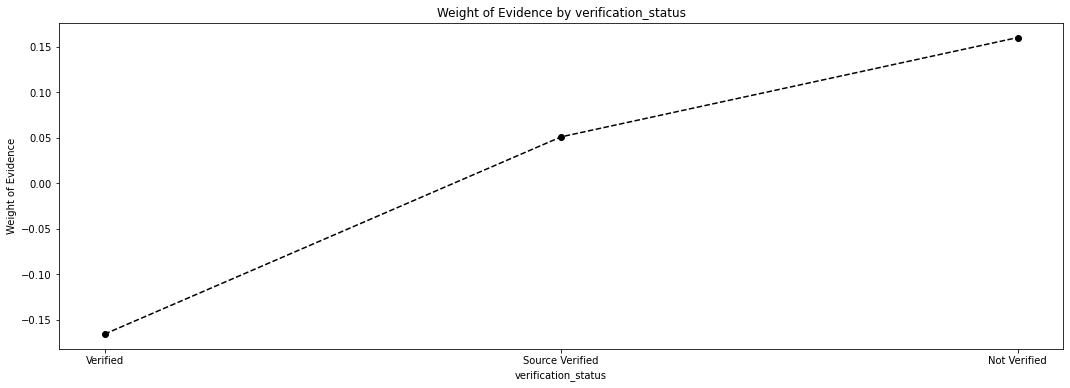

In [3166]:
plot_by_WoE(df_temp_1)

In [3167]:
df_inputs_prepr['purpose'].unique()

array(['debt_consolidation', 'other', 'major_purchase', 'small_business',
       'credit_card', 'home_improvement', 'car', 'wedding', 'moving',
       'house', 'medical', 'educational', 'vacation', 'renewable_energy'],
      dtype=object)

In [3168]:
df_temp_2=woe_discrete(df_inputs_prepr,'purpose',df_targets_prepr)
df_temp_2

purpose  no_ops  prop_good  prop_n_obs   n_good   n_bad  \
0          educational      86   0.767442    0.000922     66.0    20.0   
1     renewable_energy      76   0.776316    0.000815     59.0    17.0   
2       small_business    1385   0.781227    0.014851   1082.0   303.0   
3               moving     619   0.848142    0.006638    525.0    94.0   
4                house     434   0.854839    0.004654    371.0    63.0   
5              medical     918   0.858388    0.009844    788.0   130.0   
6             vacation     471   0.861996    0.005051    406.0    65.0   
7              wedding     443   0.864560    0.004750    383.0    60.0   
8                other    4728   0.869712    0.050699   4112.0   616.0   
9   debt_consolidation   54763   0.887990    0.587227  48629.0  6134.0   
10      major_purchase    2003   0.895157    0.021478   1793.0   210.0   
11    home_improvement    5340   0.899438    0.057261   4803.0   537.0   
12                 car    1011   0.911968    0.010841    922.0    89.0   
13         credit_card   20980   0.912345    0.224970  19141.0  1839.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  \
0      0.000794    0.001965 -0.905751             NaN       NaN   
1      0.000710    0.001670 -0.855350        0.008874  0.050402   
2      0.013024    0.029773 -0.826840        0.004912  0.028510   
3      0.006319    0.009237 -0.379570        0.066915  0.447270   
4      0.004466    0.006190 -0.326606        0.006697  0.052964   
5      0.009485    0.012774 -0.297710        0.003549  0.028896   
6      0.004887    0.006387 -0.267708        0.003608  0.030002   
7      0.004610    0.005896 -0.245983        0.002564  0.021725   
8      0.049494    0.060529 -0.201256        0.005153  0.044727   
9      0.585327    0.602732 -0.029301        0.018278  0.171955   
10     0.021582    0.020635  0.044864        0.007167  0.074165   
11     0.057812    0.052766  0.091324        0.004281  0.046460   
12     0.011098    0.008745  0.238235        0.012530  0.146911   
13     0.230392    0.180702  0.242937        0.000377  0.004702   

    Information Value  Information_Value  
0            0.001060           0.034965  
1            0.000821           0.034965  
2            0.013849           0.034965  
3            0.001107           0.034965  
4            0.000563           0.034965  
5            0.000979           0.034965  
6            0.000402           0.034965  
7            0.000316           0.034965  
8            0.002221           0.034965  
9            0.000510           0.034965  
10           0.000042           0.034965  
11           0.000461           0.034965  
12           0.000560           0.034965  
13           0.012072           0.034965

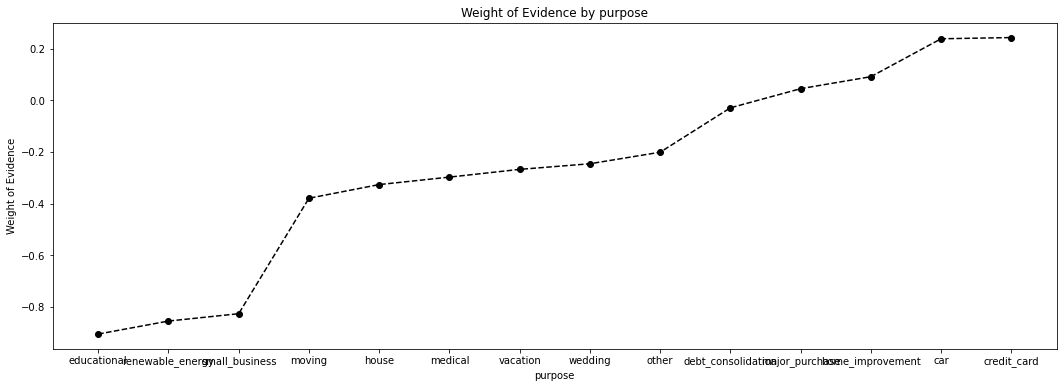

In [3169]:
plot_by_WoE(df_temp_2)

In [3170]:
df_inputs_prepr['purpose:educational,small_business,renewable_energy,moving']=sum([df_inputs_prepr['purpose:educational'],
                                                                                  df_inputs_prepr['purpose:small_business'],
                                                                            df_inputs_prepr['purpose:renewable_energy'],df_inputs_prepr['purpose:moving']])
df_inputs_prepr['purpose:medical,house,vacation,wedding']=sum([df_inputs_prepr['purpose:medical'],df_inputs_prepr['purpose:house'],
                                                              df_inputs_prepr['purpose:vacation'],df_inputs_prepr['purpose:wedding']])
df_inputs_prepr['purpose:medical,house,vacation,wedding']=sum([df_inputs_prepr['purpose:home_improvement'],df_inputs_prepr['purpose:major_purchase'],
                                                              df_inputs_prepr['purpose:car']])


In [3171]:
df_inputs_prepr['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [3172]:
df_temp_2=woe_discrete(df_inputs_prepr,'initial_list_status',df_targets_prepr)
df_temp_2

initial_list_status  no_ops  prop_good  prop_n_obs   n_good   n_bad  \
0                   f   60576   0.879474     0.64956  53275.0  7301.0   
1                   w   32681   0.911998     0.35044  29805.0  2876.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  \
0     0.641249    0.717402 -0.112218             NaN       NaN   
1     0.358751    0.282598  0.238602        0.032524   0.35082   

   Information Value  Information_Value  
0           0.008546           0.026716  
1           0.018170           0.026716

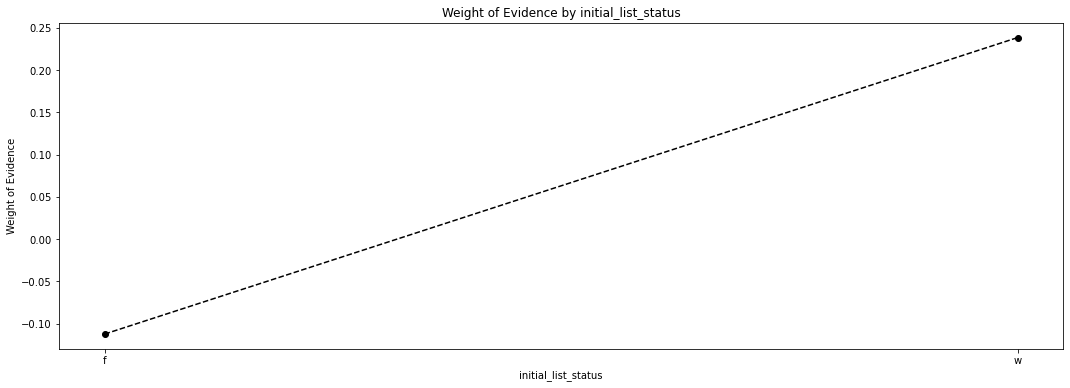

In [3173]:
plot_by_WoE(df_temp_2)

# Preprocessing Continuous Variables: Automating Calculations and Visualizing results

In [3174]:
def woe_ordered_continuous(df,discrete_variable_name,good_bad_variable_df):
    df=pd.concat([df[discrete_variable_name],good_bad_variable_df],axis=1)
    df=pd.concat([df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].mean()],axis=1)
    df=df.iloc[:,[0,1,3]]
    df.columns=[df.columns.values[0],'no_ops','prop_good']
    df['prop_n_obs']=df['no_ops']/df['no_ops'].sum()
    df['n_good']=df['prop_good']*df['no_ops']
    df['n_bad']=(1-df['prop_good'])*df['no_ops']
    df['prop_n_good']=df['n_good']/df['n_good'].sum()
    df['prop_n_bad']=df['n_bad']/df['n_bad'].sum()
    df['WoE']=np.log(df['prop_n_good']/df['prop_n_bad'])
    df['diff_prop_good']=df['prop_good'].diff().abs()
    df['diff_WoE']=df['WoE'].diff().abs()
    df['Information Value']=(df['prop_n_good']-df['prop_n_bad'])*df['WoE']
    df['Information_Value']=df['Information Value'].sum()
    return df

# Preprocessing Continuous Variables: Creating Dummy variables

In [3175]:
df_inputs_prepr['term_int'].unique()

array([36, 60])

In [3176]:
df_temp=woe_ordered_continuous(df_inputs_prepr,'term_int',df_targets_prepr)
df_temp

term_int  no_ops  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0        36   67616   0.902493     0.72505  61023.0  6593.0     0.734509   
1        60   25641   0.860224     0.27495  22057.0  3584.0     0.265491   

   prop_n_bad       WoE  diff_prop_good  diff_WoE  Information Value  \
0    0.647833  0.125569             NaN       NaN           0.010884   
1    0.352167 -0.282523         0.04227  0.408092           0.024488   

   Information_Value  
0           0.035372  
1           0.035372

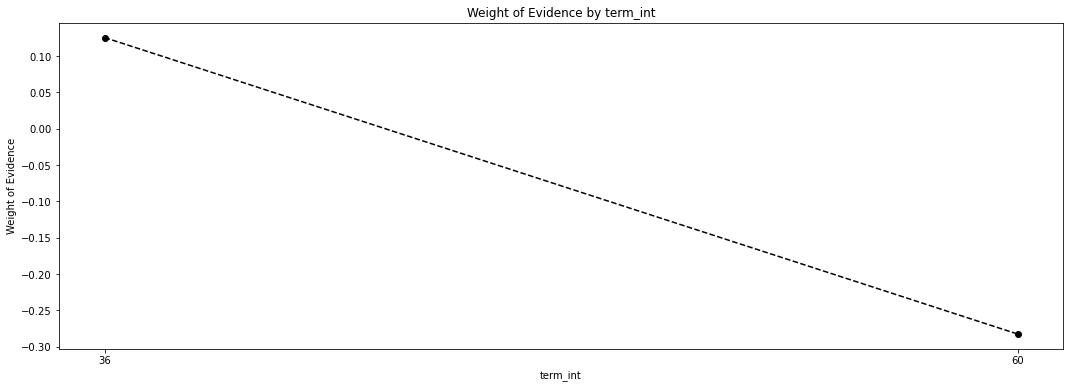

In [3177]:
plot_by_WoE(df_temp)

In [3178]:
df_inputs_prepr['emp_lenght_int'].unique()

array([10.,  0.,  4.,  2.,  3.,  1.,  5.,  7.,  6.,  8.,  9.])

In [3179]:
df_temp=woe_ordered_continuous(df_inputs_prepr,'emp_lenght_int',df_targets_prepr)
df_temp

emp_lenght_int  no_ops  prop_good  prop_n_obs   n_good   n_bad  \
0              0.0   11197   0.873448    0.120066   9780.0  1417.0   
1              1.0    5978   0.889595    0.064102   5318.0   660.0   
2              2.0    8404   0.891599    0.090117   7493.0   911.0   
3              3.0    7346   0.890280    0.078772   6540.0   806.0   
4              4.0    5618   0.889640    0.060242   4998.0   620.0   
5              5.0    6046   0.885048    0.064832   5351.0   695.0   
6              6.0    5224   0.884380    0.056017   4620.0   604.0   
7              7.0    5237   0.886385    0.056157   4642.0   595.0   
8              8.0    4416   0.890851    0.047353   3934.0   482.0   
9              9.0    3687   0.890155    0.039536   3282.0   405.0   
10            10.0   30104   0.900943    0.322807  27122.0  2982.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  \
0      0.117718    0.139236 -0.167876             NaN       NaN   
1      0.064011    0.064852 -0.013061        0.016147  0.154815   
2      0.090190    0.089516  0.007508        0.002004  0.020569   
3      0.078719    0.079198 -0.006065        0.001319  0.013573   
4      0.060159    0.060922 -0.012600        0.000640  0.006535   
5      0.064408    0.068291 -0.058547        0.004592  0.045947   
6      0.055609    0.059350 -0.065098        0.000668  0.006551   
7      0.055874    0.058465 -0.045335        0.002006  0.019763   
8      0.047352    0.047362 -0.000206        0.004466  0.045129   
9      0.039504    0.039796 -0.007353        0.000697  0.007147   
10     0.326456    0.293014  0.108077        0.010789  0.115430   

    Information Value  Information_Value  
0        3.612305e-03           0.007846  
1        1.099115e-05           0.007846  
2        5.064862e-06           0.007846  
3        2.904451e-06           0.007846  
4        9.611391e-06           0.007846  
5        2.273634e-04           0.007846  
6        2.434964e-04           0.007846  
7        1.174759e-04           0.007846  
8        2.006551e-09           0.007846  
9        2.143445e-06           0.007846  
10       3.614403e-03           0.007846

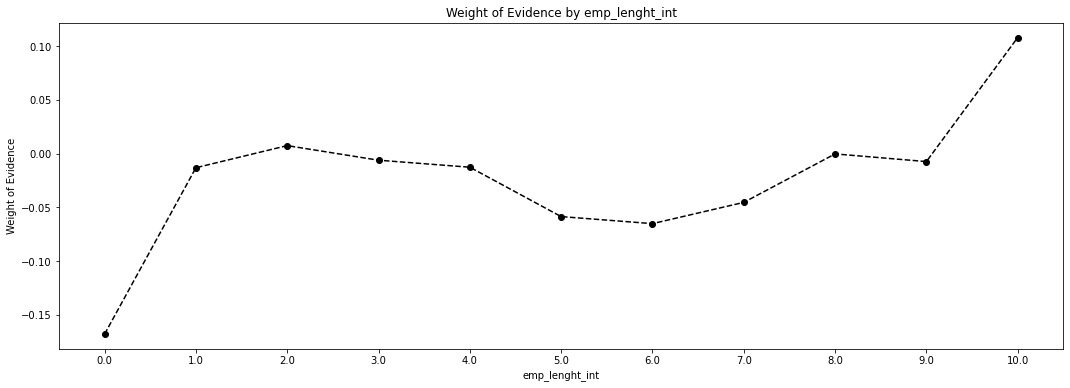

In [3180]:
plot_by_WoE(df_temp)

In [3181]:
df_inputs_prepr['emp_lenght:0']=np.where(df_inputs_prepr['emp_lenght_int'].isin([0]),1,0)
df_inputs_prepr['emp_lenght:1']=np.where(df_inputs_prepr['emp_lenght_int'].isin([1]),1,0)
df_inputs_prepr['emp_lenght:2-4']=np.where(df_inputs_prepr['emp_lenght_int'].isin(range(2,5)),1,0)
df_inputs_prepr['emp_lenght:5-6']=np.where(df_inputs_prepr['emp_lenght_int'].isin(range(5,7)),1,0)
df_inputs_prepr['emp_lenght:7-9']=np.where(df_inputs_prepr['emp_lenght_int'].isin(range(7,10)),1,0)
df_inputs_prepr['emp_lenght:10']=np.where(df_inputs_prepr['emp_lenght_int'].isin([10]),1,0)

In [3182]:
df_inputs_prepr['mnths_since_issue_d'].unique()

array([ 44.,  45.,  76.,  74.,  52.,  37.,  55.,  68.,  38.,  82.,  42.,
        75.,  41.,  40.,  65.,  99.,  56.,  47.,  88.,  36.,  63., 117.,
        71.,  59.,  46.,  66.,  50.,  62.,  64.,  57.,  87.,  48., 114.,
        70.,  54.,  51.,  86.,  43.,  77., 108., 106.,  85.,  61.,  94.,
        67.,  90.,  60.,  49., 121.,  84.,  58.,  78.,  93.,  95.,  92.,
        80.,  39., 119.,  53., 124.,  81.,  89.,  98.,  72., 101.,  79.,
        73.,  91.,  69.,  97.,  83., 120., 102.,  96., 104., 125., 105.,
       118., 100., 113., 103., 116., 109., 112., 122., 107., 115., 110.,
       123., 126., 111.])

In [3183]:
df_inputs_prepr['mnths_since_issue_d_factor']=pd.cut(df_inputs_prepr['mnths_since_issue_d'],50)

In [3184]:
df_inputs_prepr['mnths_since_issue_d_factor']

406269      (43.2, 45.0]
424213      (43.2, 45.0]
9741        (75.6, 77.4]
5237        (73.8, 75.6]
104468      (50.4, 52.2]
243414     (35.91, 37.8]
143174      (54.0, 55.8]
220073      (66.6, 68.4]
295103      (37.8, 39.6]
429549      (43.2, 45.0]
20066       (81.0, 82.8]
374777      (41.4, 43.2]
6588        (73.8, 75.6]
346819      (39.6, 41.4]
345265      (39.6, 41.4]
278194      (37.8, 39.6]
275985      (37.8, 39.6]
323516      (39.6, 41.4]
212264      (64.8, 66.6]
35075       (97.2, 99.0]
147007      (55.8, 57.6]
459809      (46.8, 48.6]
26643       (86.4, 88.2]
237208     (35.91, 37.8]
199210      (61.2, 63.0]
39029     (115.2, 117.0]
228748      (70.2, 72.0]
107928      (50.4, 52.2]
171492      (57.6, 59.4]
443207      (45.0, 46.8]
214842      (64.8, 66.6]
371218      (41.4, 43.2]
82526       (48.6, 50.4]
190500      (61.2, 63.0]
205660      (63.0, 64.8]
209962      (64.8, 66.6]
193391      (61.2, 63.0]
334642      (39.6, 41.4]
366553      (41.4, 43.2]
383138      (41.4, 43.2]


In [3185]:
df_temp=woe_ordered_continuous(df_inputs_prepr,'mnths_since_issue_d_factor',df_targets_prepr)
df_temp

mnths_since_issue_d_factor  no_ops  prop_good  prop_n_obs  n_good  n_bad  \
0               (35.91, 37.8]    7027   0.942223    0.075351  6621.0  406.0   
1                (37.8, 39.6]    9935   0.931354    0.106534  9253.0  682.0   
2                (39.6, 41.4]    9594   0.920992    0.102877  8836.0  758.0   
3                (41.4, 43.2]    7233   0.911931    0.077560  6596.0  637.0   
4                (43.2, 45.0]    7098   0.896450    0.076112  6363.0  735.0   
5                (45.0, 46.8]    3083   0.898476    0.033059  2770.0  313.0   
6                (46.8, 48.6]    6200   0.896129    0.066483  5556.0  644.0   
7                (48.6, 50.4]    5706   0.886786    0.061186  5060.0  646.0   
8                (50.4, 52.2]    5074   0.879976    0.054409  4465.0  609.0   
9                (52.2, 54.0]    4607   0.877143    0.049401  4041.0  566.0   
10               (54.0, 55.8]    2045   0.850856    0.021929  1740.0  305.0   
11               (55.8, 57.6]    3468   0.858997    0.037188  2979.0  489.0   
12               (57.6, 59.4]    2928   0.863388    0.031397  2528.0  400.0   
13               (59.4, 61.2]    2505   0.845509    0.026861  2118.0  387.0   
14               (61.2, 63.0]    2465   0.855172    0.026432  2108.0  357.0   
15               (63.0, 64.8]    1027   0.839338    0.011013   862.0  165.0   
16               (64.8, 66.6]    1711   0.835769    0.018347  1430.0  281.0   
17               (66.6, 68.4]    1374   0.825328    0.014733  1134.0  240.0   
18               (68.4, 70.2]    1129   0.831709    0.012106   939.0  190.0   
19               (70.2, 72.0]     972   0.810700    0.010423   788.0  184.0   
20               (72.0, 73.8]     457   0.873085    0.004900   399.0   58.0   
21               (73.8, 75.6]     852   0.854460    0.009136   728.0  124.0   
22               (75.6, 77.4]     768   0.854167    0.008235   656.0  112.0   
23               (77.4, 79.2]     694   0.844380    0.007442   586.0  108.0   
24               (79.2, 81.0]     605   0.872727    0.006487   528.0   77.0   
25               (81.0, 82.8]     244   0.836066    0.002616   204.0   40.0   
26               (82.8, 84.6]     504   0.865079    0.005404   436.0   68.0   
27               (84.6, 86.4]     446   0.863229    0.004782   385.0   61.0   
28               (86.4, 88.2]     481   0.841996    0.005158   405.0   76.0   
29               (88.2, 90.0]     469   0.863539    0.005029   405.0   64.0   
30               (90.0, 91.8]     223   0.865471    0.002391   193.0   30.0   
31               (91.8, 93.6]     344   0.904070    0.003689   311.0   33.0   
32               (93.6, 95.4]     296   0.875000    0.003174   259.0   37.0   
33               (95.4, 97.2]     256   0.871094    0.002745   223.0   33.0   
34               (97.2, 99.0]     226   0.849558    0.002423   192.0   34.0   
35              (99.0, 100.8]      92   0.891304    0.000987    82.0   10.0   
36             (100.8, 102.6]     173   0.890173    0.001855   154.0   19.0   
37             (102.6, 104.4]     113   0.778761    0.001212    88.0   25.0   
38             (104.4, 106.2]     137   0.890511    0.001469   122.0   15.0   
39             (106.2, 108.0]     107   0.850467    0.001147    91.0   16.0   
40             (108.0, 109.8]      31   0.870968    0.000332    27.0    4.0   
41             (109.8, 111.6]      35   0.742857    0.000375    26.0    9.0   
42             (111.6, 113.4]      50   0.760000    0.000536    38.0   12.0   
43             (113.4, 115.2]      52   0.692308    0.000558    36.0   16.0   
44             (115.2, 117.0]     154   0.746753    0.001651   115.0   39.0   
45             (117.0, 118.8]      79   0.797468    0.000847    63.0   16.0   
46             (118.8, 120.6]     104   0.711538    0.001115    74.0   30.0   
47             (120.6, 122.4]      44   0.772727    0.000472    34.0   10.0   
48             (122.4, 124.2]      28   0.821429    0.000300    23.0    5.0   
49             (124.2, 126.0]      12   0.833333    0

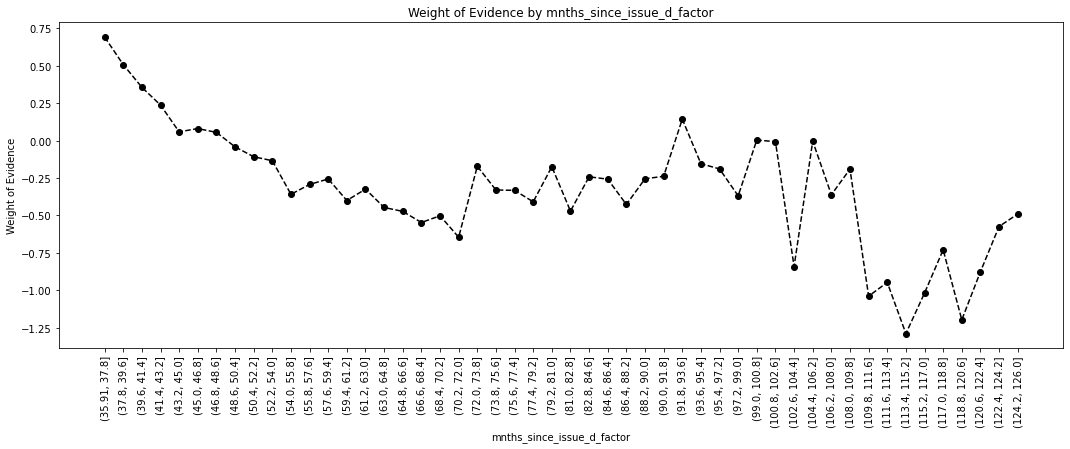

In [3186]:
plot_by_WoE(df_temp,90)

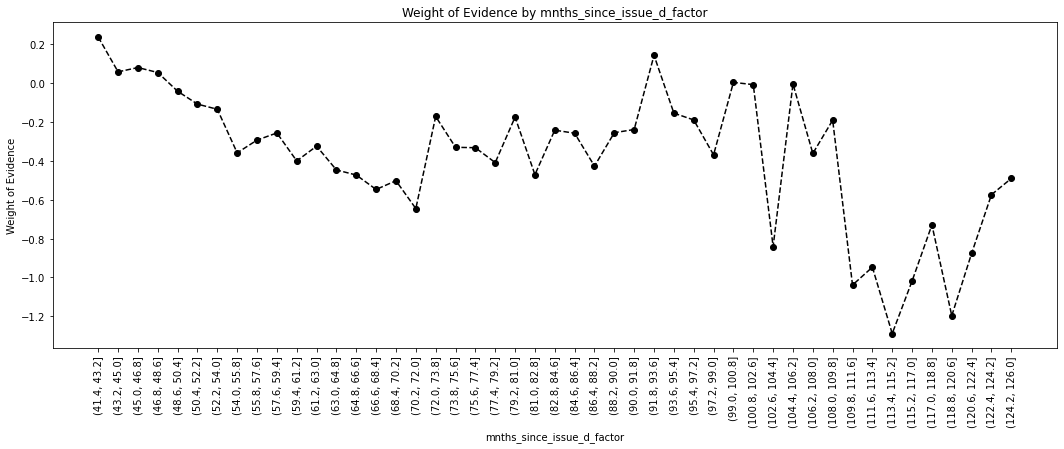

In [3187]:
plot_by_WoE(df_temp.iloc[3:,:],90)

In [3188]:
df_inputs_prepr['mnths_since_issue_d_factor:<30']=np.where(df_inputs_prepr['mnths_since_issue_d_factor'].isin(range(38)),1,0)
df_inputs_prepr['mnths_since_issue_d_factor:38-39']=np.where(df_inputs_prepr['mnths_since_issue_d_factor'].isin(range(38,40)),1,0)
df_inputs_prepr['mnths_since_issue_d_factor:40-41']=np.where(df_inputs_prepr['mnths_since_issue_d_factor'].isin(range(40,42)),1,0)
df_inputs_prepr['mnths_since_issue_d_factor:42-49']=np.where(df_inputs_prepr['mnths_since_issue_d_factor'].isin(range(42,49)),1,0)
df_inputs_prepr['mnths_since_issue_d_factor:49-52']=np.where(df_inputs_prepr['mnths_since_issue_d_factor'].isin(range(49,53)),1,0)
df_inputs_prepr['mnths_since_issue_d_factor:53-64']=np.where(df_inputs_prepr['mnths_since_issue_d_factor'].isin(range(53,65)),1,0)
df_inputs_prepr['mnths_since_issue_d_factor:65-84']=np.where(df_inputs_prepr['mnths_since_issue_d_factor'].isin(range(65,85)),1,0)
df_inputs_prepr['mnths_since_issue_d_factor:>84']=np.where(df_inputs_prepr['mnths_since_issue_d_factor'].isin(range(85,int(df_inputs_prepr['mnths_since_issue_d'].max()))),1,0)

In [3189]:
df_inputs_prepr['int_rate_factor']=pd.cut(df_inputs_prepr['int_rate'],50)

In [3190]:
df_temp=woe_ordered_continuous(df_inputs_prepr,'int_rate_factor',df_targets_prepr)
df_temp

int_rate_factor  no_ops  prop_good  prop_n_obs  n_good  n_bad  \
0     (5.399, 5.833]     211   0.976303    0.002263   206.0    5.0   
1     (5.833, 6.246]    2136   0.980805    0.022904  2095.0   41.0   
2     (6.246, 6.658]    2031   0.969966    0.021779  1970.0   61.0   
3     (6.658, 7.071]     478   0.960251    0.005126   459.0   19.0   
4     (7.071, 7.484]     820   0.984146    0.008793   807.0   13.0   
5     (7.484, 7.897]    3136   0.967793    0.033628  3035.0  101.0   
6      (7.897, 8.31]    2340   0.944444    0.025092  2210.0  130.0   
7      (8.31, 8.722]    1657   0.963186    0.017768  1596.0   61.0   
8     (8.722, 9.135]    2447   0.937474    0.026239  2294.0  153.0   
9     (9.135, 9.548]    1574   0.963151    0.016878  1516.0   58.0   
10    (9.548, 9.961]    1989   0.940674    0.021328  1871.0  118.0   
11   (9.961, 10.374]    2704   0.940459    0.028995  2543.0  161.0   
12  (10.374, 10.786]    1458   0.917695    0.015634  1338.0  120.0   
13  (10.786, 11.199]    4384   0.927235    0.047010  4065.0  319.0   
14  (11.199, 11.612]    1209   0.921423    0.012964  1114.0   95.0   
15  (11.612, 12.025]    3875   0.931097    0.041552  3608.0  267.0   
16  (12.025, 12.438]    3119   0.888746    0.033445  2772.0  347.0   
17   (12.438, 12.85]    2774   0.919971    0.029746  2552.0  222.0   
18   (12.85, 13.263]    5271   0.897742    0.056521  4732.0  539.0   
19  (13.263, 13.676]    3852   0.901350    0.041305  3472.0  380.0   
20  (13.676, 14.089]    2745   0.901275    0.029435  2474.0  271.0   
21  (14.089, 14.502]    5896   0.886024    0.063223  5224.0  672.0   
22  (14.502, 14.914]    1068   0.864232    0.011452   923.0  145.0   
23  (14.914, 15.327]    4764   0.878463    0.051085  4185.0  579.0   
24   (15.327, 15.74]    3101   0.886166    0.033252  2748.0  353.0   
25   (15.74, 16.153]    1896   0.845992    0.020331  1604.0  292.0   
26  (16.153, 16.566]    3175   0.861417    0.034046  2735.0  440.0   
27  (16.566, 16.978]    1083   0.847645    0.011613   918.0  165.0   
28  (16.978, 17.391]    2878   0.863099    0.030861  2484.0  394.0   
29  (17.391, 17.804]    3055   0.842226    0.032759  2573.0  482.0   
30  (17.804, 18.217]     304   0.819079    0.003260   249.0   55.0   
31   (18.217, 18.63]    2792   0.827722    0.029939  2311.0  481.0   
32   (18.63, 19.042]    1707   0.823667    0.018304  1406.0  301.0   
33  (19.042, 19.455]    1080   0.805556    0.011581   870.0  210.0   
34  (19.455, 19.868]    1684   0.835511    0.018058  1407.0  277.0   
35  (19.868, 20.281]    1179   0.832909    0.012642   982.0  197.0   
36  (20.281, 20.694]     829   0.796140    0.008889   660.0  169.0   
37  (20.694, 21.106]     996   0.819277    0.010680   816.0  180.0   
38  (21.106, 21.519]     662   0.776435    0.007099   514.0  148.0   
39  (21.519, 21.932]     238   0.785714    0.002552   187.0   51.0   
40  (21.932, 22.345]     863   0.791425    0.009254   683.0  180.0   
41  (22.345, 22.758]     569   0.766257    0.006101   436.0  133.0   
42   (22.758, 23.17]     354   0.745763    0.003796   264.0   90.0   
43   (23.17, 23.583]     648   0.783951    0.006949   508.0  140.0   
44  (23.583, 23.996]     398   0.721106    0.004268   287.0  111.0   
45  (23.996, 24.409]     385   0.750649    0.004128   289.0   96.0   
46  (24.409, 24.822]     418   0.779904    0.004482   326.0   92.0   
47  (24.822, 25.234]     338   0.766272    0.003624   259.0   79.0   
48  (25.234, 25.647]     212   0.688679    0.002273   146.0   66.0   
49   (25.647, 26.06]     475   0.751579    0.005093   357.0  118.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  \
0      0.002480    0.000491  1.618765             NaN       NaN   
1      0.025217    0.004029  1.834063        0.004502  0.215299   
2      0.023712    0.005994  1.375241        0.010840  0.458822   
3      0.005525    0.001867  1.084938        0.009714  0.290304   
4      0.009714    0.001277  2.028701        0.023895  0.943763   
5      0.036531    0.009924  1.3

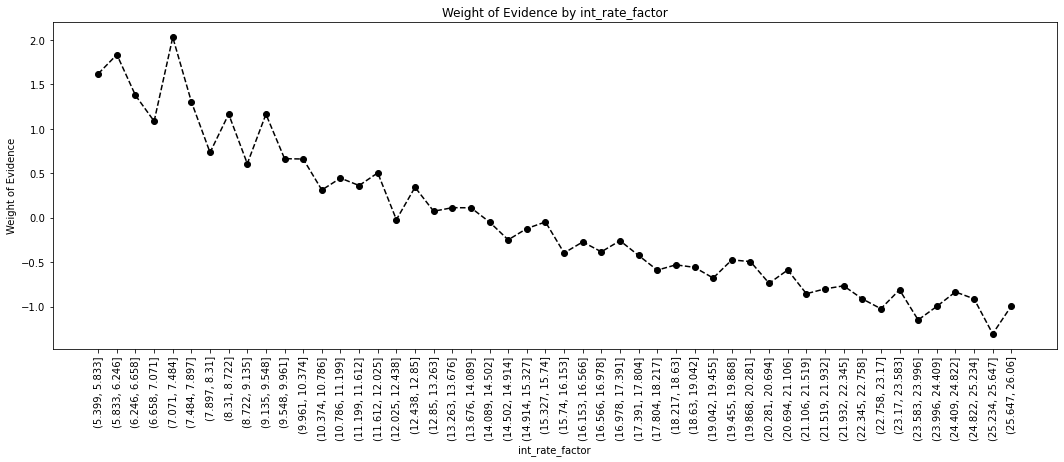

In [3191]:
plot_by_WoE(df_temp,90)

In [3192]:
df_inputs_prepr['int_rate:<9.548']=np.where((df_inputs_prepr['int_rate']<=9.548),1,0)
df_inputs_prepr['int_rate:9.548-12.025']=np.where((df_inputs_prepr['int_rate']>9.548) & (df_inputs_prepr['int_rate']<=12.025),1,0)
df_inputs_prepr['int_rate:12.025-15.74']=np.where((df_inputs_prepr['int_rate']>12.025) & (df_inputs_prepr['int_rate']<=15.74),1,0)
df_inputs_prepr['int_rate:15.74-20.281']=np.where((df_inputs_prepr['int_rate']>15.74) & (df_inputs_prepr['int_rate']<=20.281),1,0)
df_inputs_prepr['int_rate:20.281']=np.where((df_inputs_prepr['int_rate']>=20.281),1,0)

In [3193]:
df_inputs_prepr['funded_amnt_factor']=pd.cut(df_inputs_prepr['funded_amnt'],50)
df_temp=woe_ordered_continuous(df_inputs_prepr,'funded_amnt_factor',df_targets_prepr)
df_temp

funded_amnt_factor  no_ops  prop_good  prop_n_obs  n_good  n_bad  \
0      (465.5, 1190.0]     298   0.895973    0.003195   267.0   31.0   
1     (1190.0, 1880.0]     798   0.890977    0.008557   711.0   87.0   
2     (1880.0, 2570.0]    1517   0.889914    0.016267  1350.0  167.0   
3     (2570.0, 3260.0]    1830   0.889071    0.019623  1627.0  203.0   
4     (3260.0, 3950.0]    1193   0.886002    0.012793  1057.0  136.0   
5     (3950.0, 4640.0]    2177   0.892053    0.023344  1942.0  235.0   
6     (4640.0, 5330.0]    4080   0.887745    0.043750  3622.0  458.0   
7     (5330.0, 6020.0]    4323   0.905390    0.046356  3914.0  409.0   
8     (6020.0, 6710.0]    1757   0.891861    0.018840  1567.0  190.0   
9     (6710.0, 7400.0]    2984   0.891756    0.031998  2661.0  323.0   
10    (7400.0, 8090.0]    4532   0.894528    0.048597  4054.0  478.0   
11    (8090.0, 8780.0]    1549   0.883150    0.016610  1368.0  181.0   
12    (8780.0, 9470.0]    2264   0.875000    0.024277  1981.0  283.0   
13   (9470.0, 10160.0]    8312   0.897618    0.089130  7461.0  851.0   
14  (10160.0, 10850.0]    1703   0.874927    0.018261  1490.0  213.0   
15  (10850.0, 11540.0]    2197   0.873464    0.023559  1919.0  278.0   
16  (11540.0, 12230.0]    5870   0.909540    0.062944  5339.0  531.0   
17  (12230.0, 12920.0]    1215   0.873251    0.013029  1061.0  154.0   
18  (12920.0, 13610.0]    1770   0.896045    0.018980  1586.0  184.0   
19  (13610.0, 14300.0]    2044   0.890900    0.021918  1821.0  223.0   
20  (14300.0, 14990.0]    1247   0.886127    0.013372  1105.0  142.0   
21  (14990.0, 15680.0]    5312   0.905309    0.056961  4809.0  503.0   
22  (15680.0, 16370.0]    2943   0.891267    0.031558  2623.0  320.0   
23  (16370.0, 17060.0]    1604   0.869701    0.017200  1395.0  209.0   
24  (17060.0, 17750.0]     869   0.860759    0.009318   748.0  121.0   
25  (17750.0, 18440.0]    2875   0.890087    0.030829  2559.0  316.0   
26  (18440.0, 19130.0]     989   0.860465    0.010605   851.0  138.0   
27  (19130.0, 19820.0]    1018   0.851670    0.010916   867.0  151.0   
28  (19820.0, 20510.0]    5021   0.897829    0.053840  4508.0  513.0   
29  (20510.0, 21200.0]    1691   0.890006    0.018133  1505.0  186.0   
30  (21200.0, 21890.0]     512   0.849609    0.005490   435.0   77.0   
31  (21890.0, 22580.0]    1031   0.880698    0.011055   908.0  123.0   
32  (22580.0, 23270.0]     595   0.900840    0.006380   536.0   59.0   
33  (23270.0, 23960.0]     418   0.834928    0.004482   349.0   69.0   
34  (23960.0, 24650.0]    2502   0.904876    0.026829  2264.0  238.0   
35  (24650.0, 25340.0]    2459   0.892233    0.026368  2194.0  265.0   
36  (25340.0, 26030.0]     459   0.860566    0.004922   395.0   64.0   
37  (26030.0, 26720.0]     282   0.851064    0.003024   240.0   42.0   
38  (26720.0, 27410.0]     400   0.882500    0.004289   353.0   47.0   
39  (27410.0, 28100.0]    1659   0.909584    0.017790  1509.0  150.0   
40  (28100.0, 28790.0]     207   0.826087    0.002220   171.0   36.0   
41  (28790.0, 29480.0]     290   0.837931    0.003110   243.0   47.0   
42  (29480.0, 30170.0]    1870   0.883422    0.020052  1652.0  218.0   
43  (30170.0, 30860.0]     124   0.830645    0.001330   103.0   21.0   
44  (30860.0, 31550.0]     196   0.897959    0.002102   176.0   20.0   
45  (31550.0, 32240.0]     351   0.883191    0.003764   310.0   41.0   
46  (32240.0, 32930.0]     146   0.890411    0.001566   130.0   16.0   
47  (32930.0, 33620.0]     275   0.890909    0.002949   245.0   30.0   
48  (33620.0, 34310.0]     139   0.892086    0.001491   124.0   15.0   
49  (34310.0, 35000.0]    3360   0.885417    0.036029  2975.0  385.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  \
0      0.003214    0.003046  0.053588             NaN       NaN   
1      0.008558    0.008549  0.001091        0.004996  0.052497   
2      0.016249    0.016410 -0.009808        0.001063  0.010898   
3      0.019584    0.019947 -0.018387        0.000843  0.008579

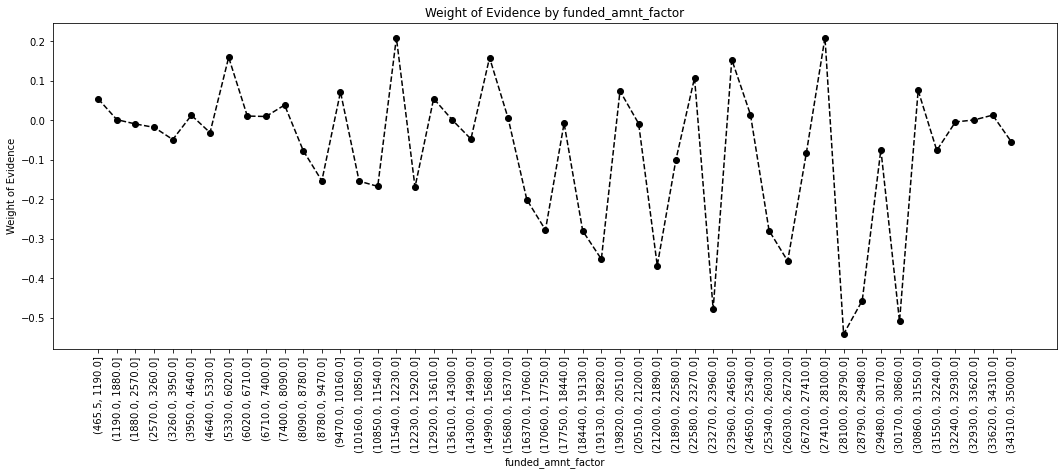

In [3194]:
plot_by_WoE(df_temp,90)

In [3195]:
df_inputs_prepr['mnths_since_earliest_cr_line_factor']=pd.cut(df_inputs_prepr['mnths_since_earliest_cr_line'],50)

In [3196]:
df_temp=woe_ordered_continuous(df_inputs_prepr,'mnths_since_earliest_cr_line_factor',df_targets_prepr)
df_temp

mnths_since_earliest_cr_line_factor  no_ops  prop_good  prop_n_obs  n_good  \
0                      (-0.587, 11.74]       1   1.000000    0.000011     1.0   
1                       (11.74, 23.48]       0        NaN    0.000000     NaN   
2                       (23.48, 35.22]       0        NaN    0.000000     NaN   
3                       (35.22, 46.96]       0        NaN    0.000000     NaN   
4                        (46.96, 58.7]       0        NaN    0.000000     NaN   
5                        (58.7, 70.44]       0        NaN    0.000000     NaN   
6                       (70.44, 82.18]     180   0.883333    0.001930   159.0   
7                       (82.18, 93.92]     458   0.890830    0.004911   408.0   
8                      (93.92, 105.66]     680   0.851471    0.007292   579.0   
9                      (105.66, 117.4]    1242   0.866345    0.013318  1076.0   
10                     (117.4, 129.14]    2298   0.868146    0.024642  1995.0   
11                    (129.14, 140.88]    2865   0.871553    0.030722  2497.0   
12                    (140.88, 152.62]    3401   0.870920    0.036469  2962.0   
13                    (152.62, 164.36]    4106   0.880906    0.044029  3617.0   
14                     (164.36, 176.1]    4891   0.879166    0.052446  4300.0   
15                     (176.1, 187.84]    5065   0.885291    0.054312  4484.0   
16                    (187.84, 199.58]    6504   0.883764    0.069743  5748.0   
17                    (199.58, 211.32]    7132   0.888531    0.076477  6337.0   
18                    (211.32, 223.06]    6754   0.883921    0.072424  5970.0   
19                     (223.06, 234.8]    5584   0.886103    0.059878  4948.0   
20                     (234.8, 246.54]    5005   0.886513    0.053669  4437.0   
21                    (246.54, 258.28]    4432   0.896435    0.047525  3973.0   
22                    (258.28, 270.02]    4609   0.895856    0.049423  4129.0   
23                    (270.02, 281.76]    3701   0.898946    0.039686  3327.0   
24                     (281.76, 293.5]    3549   0.905325    0.038056  3213.0   
25                     (293.5, 305.24]    2571   0.913652    0.027569  2349.0   
26                    (305.24, 316.98]    1911   0.900052    0.020492  1720.0   
27                    (316.98, 328.72]    2117   0.901748    0.022701  1909.0   
28                    (328.72, 340.46]    2097   0.913209    0.022486  1915.0   
29                     (340.46, 352.2]    1816   0.913546    0.019473  1659.0   
30                     (352.2, 363.94]    1440   0.913194    0.015441  1315.0   
31                    (363.94, 375.68]    1304   0.913344    0.013983  1191.0   
32                    (375.68, 387.42]    1111   0.910891    0.011913  1012.0   
33                    (387.42, 399.16]    1036   0.906371    0.011109   939.0   
34                     (399.16, 410.9]     882   0.901361    0.009458   795.0   
35                     (410.9, 422.64]     778   0.912596    0.008343   710.0   
36                    (422.64, 434.38]     558   0.903226    0.005983   504.0   
37                    (434.38, 446.12]     424   0.905660    0.004547   384.0   
38                    (446.12, 457.86]     358   0.918994    0.003839   329.0   
39                     (457.86, 469.6]     398   0.939698    0.004268   374.0   
40                     (469.6, 481.34]     378   0.928571    0.004053   351.0   
41                    (481.34, 493.08]     318   0.918239    0.003410   292.0   
42                    (493.08, 504.82]     234   0.927350    0.002509   217.0   
43                    (504.82, 516.56]     191   0.931937    0.002048   178.0   
44                     (516.56, 528.3]     158   0.873418    0.001694   138.0   
45                     (528.3, 540.04]     151   0.927152    0.001619   140.0   
46                    (540.04, 551.78]     127   0.929134    0.001362   118.0   
47                    (551.78, 563.52]      77   0.805195    0.000826    62.0   
48                    (563.52, 575

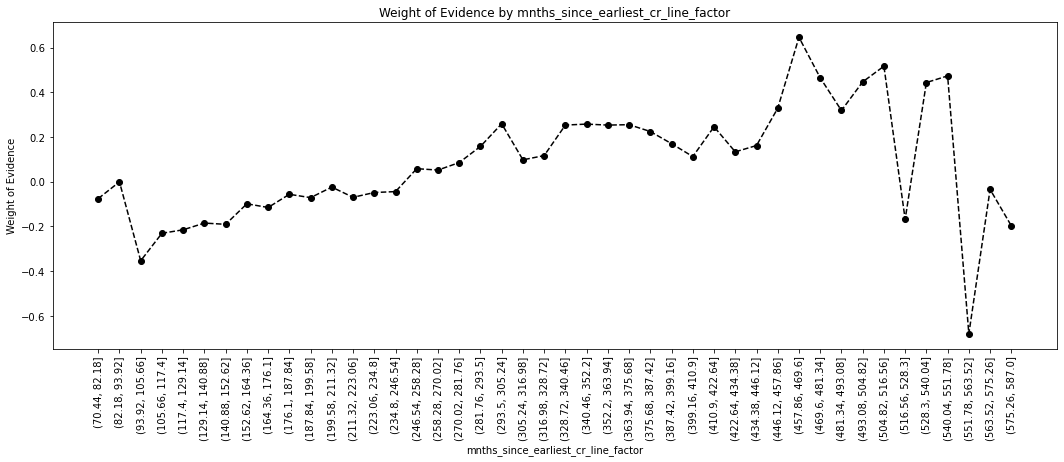

In [3197]:
plot_by_WoE(df_temp.iloc[6:,:],90)

In [3198]:
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mnths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mnths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mnths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mnths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mnths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mnths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mnths_since_earliest_cr_line'].max()))), 1, 0)

In [3199]:
df_inputs_prepr['installment_factor']=pd.cut(df_inputs_prepr['installment'],50)

In [3200]:
df_temp=woe_ordered_continuous(df_inputs_prepr,'installment_factor',df_targets_prepr)
df_temp

installment_factor  no_ops  prop_good  prop_n_obs  n_good  n_bad  \
0        (15.076, 44.34]     471   0.889597    0.005051   419.0   52.0   
1        (44.34, 72.211]    1287   0.888112    0.013801  1143.0  144.0   
2      (72.211, 100.081]    1716   0.893357    0.018401  1533.0  183.0   
3     (100.081, 127.952]    2282   0.896582    0.024470  2046.0  236.0   
4     (127.952, 155.822]    2544   0.895047    0.027279  2277.0  267.0   
5     (155.822, 183.692]    4201   0.886456    0.045048  3724.0  477.0   
6     (183.692, 211.563]    4345   0.897814    0.046592  3901.0  444.0   
7     (211.563, 239.433]    3804   0.909569    0.040791  3460.0  344.0   
8     (239.433, 267.304]    4881   0.903094    0.052339  4408.0  473.0   
9     (267.304, 295.174]    5049   0.885126    0.054141  4469.0  580.0   
10    (295.174, 323.044]    5073   0.899074    0.054398  4561.0  512.0   
11    (323.044, 350.915]    6392   0.891114    0.068542  5696.0  696.0   
12    (350.915, 378.785]    4777   0.884865    0.051224  4227.0  550.0   
13    (378.785, 406.656]    4342   0.899585    0.046560  3906.0  436.0   
14    (406.656, 434.526]    3321   0.879554    0.035611  2921.0  400.0   
15    (434.526, 462.396]    3201   0.885036    0.034325  2833.0  368.0   
16    (462.396, 490.267]    3779   0.898386    0.040522  3395.0  384.0   
17    (490.267, 518.137]    3872   0.890496    0.041520  3448.0  424.0   
18    (518.137, 546.008]    2735   0.878611    0.029328  2403.0  332.0   
19    (546.008, 573.878]    2591   0.869162    0.027783  2252.0  339.0   
20    (573.878, 601.748]    2270   0.877093    0.024341  1991.0  279.0   
21    (601.748, 629.619]    2313   0.901859    0.024802  2086.0  227.0   
22    (629.619, 657.489]    2133   0.901078    0.022872  1922.0  211.0   
23     (657.489, 685.36]    2308   0.880416    0.024749  2032.0  276.0   
24      (685.36, 713.23]    1480   0.874324    0.015870  1294.0  186.0   
25       (713.23, 741.1]    1248   0.879808    0.013382  1098.0  150.0   
26      (741.1, 768.971]    1301   0.902383    0.013951  1174.0  127.0   
27    (768.971, 796.841]    1225   0.907755    0.013136  1112.0  113.0   
28    (796.841, 824.712]    1036   0.889961    0.011109   922.0  114.0   
29    (824.712, 852.582]     914   0.893873    0.009801   817.0   97.0   
30    (852.582, 880.452]    1087   0.891444    0.011656   969.0  118.0   
31    (880.452, 908.323]     824   0.862864    0.008836   711.0  113.0   
32    (908.323, 936.193]     565   0.881416    0.006059   498.0   67.0   
33    (936.193, 964.064]     592   0.869932    0.006348   515.0   77.0   
34    (964.064, 991.934]     457   0.849015    0.004900   388.0   69.0   
35   (991.934, 1019.804]     362   0.859116    0.003882   311.0   51.0   
36  (1019.804, 1047.675]     317   0.883281    0.003399   280.0   37.0   
37  (1047.675, 1075.545]     205   0.878049    0.002198   180.0   25.0   
38  (1075.545, 1103.416]     265   0.928302    0.002842   246.0   19.0   
39  (1103.416, 1131.286]     219   0.940639    0.002348   206.0   13.0   
40  (1131.286, 1159.156]     250   0.944000    0.002681   236.0   14.0   
41  (1159.156, 1187.027]     297   0.912458    0.003185   271.0   26.0   
42  (1187.027, 1214.897]     299   0.886288    0.003206   265.0   34.0   
43  (1214.897, 1242.768]     250   0.880000    0.002681   220.0   30.0   
44  (1242.768, 1270.638]     187   0.844920    0.002005   158.0   29.0   
45  (1270.638, 1298.508]     101   0.841584    0.001083    85.0   16.0   
46  (1298.508, 1326.379]      47   0.829787    0.000504    39.0    8.0   
47  (1326.379, 1354.249]      27   0.703704    0.000290    19.0    8.0   
48   (1354.249, 1382.12]       7   0.714286    0.000075     5.0    2.0   
49    (1382.12, 1409.99]       8   1.000000    0.000086     8.0    0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  \
0      0.005043    0.005110 -0.013047             NaN       NaN   
1      0.013758    0.014150 -0.028075        0.001485  0.015029   
2      0.018452    0.017982  0

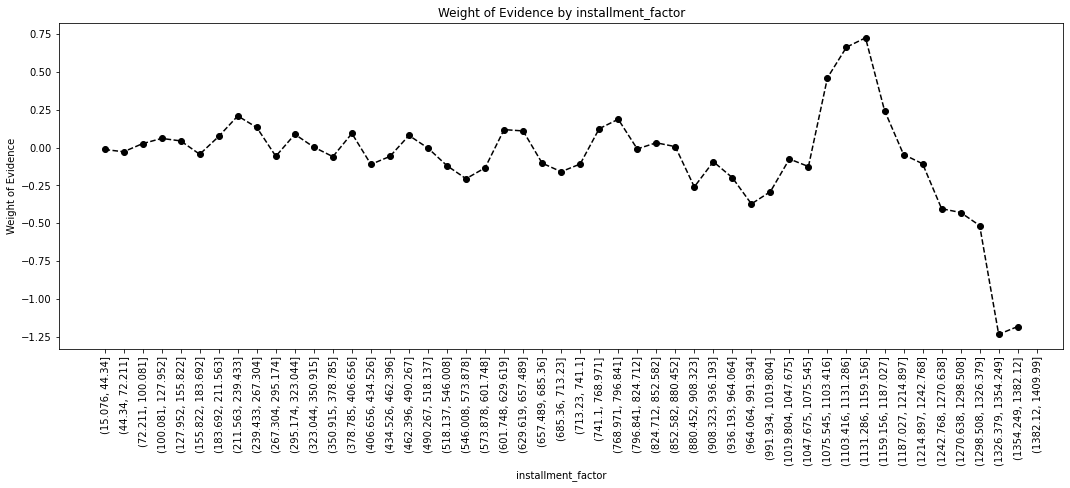

In [3201]:
plot_by_WoE(df_temp,90)

In [3202]:
df_temp=woe_ordered_continuous(df_inputs_prepr,'delinq_2yrs',df_targets_prepr)
df_temp

/Users/shankar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


delinq_2yrs  no_ops  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0           0.0   76615   0.890478    0.821547  68224.0  8391.0     0.821184   
1           1.0   11206   0.893361    0.120163  10011.0  1195.0     0.120498   
2           2.0    3264   0.894301    0.035000   2919.0   345.0     0.035135   
3           3.0    1146   0.882199    0.012289   1011.0   135.0     0.012169   
4           4.0     496   0.909274    0.005319    451.0    45.0     0.005429   
5           5.0     223   0.878924    0.002391    196.0    27.0     0.002359   
6           6.0     126   0.888889    0.001351    112.0    14.0     0.001348   
7           7.0      76   0.868421    0.000815     66.0    10.0     0.000794   
8           8.0      47   0.893617    0.000504     42.0     5.0     0.000506   
9           9.0      21   0.809524    0.000225     17.0     4.0     0.000205   
10         10.0       7   0.857143    0.000075      6.0     1.0     0.000072   
11         11.0      13   0.923077    0.000139     12.0     1.0     0.000144   
12         12.0       9   0.777778    0.000097      7.0     2.0     0.000084   
13         13.0       5   0.600000    0.000054      3.0     2.0     0.000036   
14         15.0       1   1.000000    0.000011      1.0     0.0     0.000012   
15         18.0       1   1.000000    0.000011      1.0     0.0     0.000012   
16         22.0       1   1.000000    0.000011      1.0     0.0     0.000012   

    prop_n_bad       WoE  diff_prop_good  diff_WoE  Information Value  \
0     0.824506 -0.004037             NaN       NaN       1.341033e-05   
1     0.117422  0.025865        0.002882  0.029902       7.957697e-05   
2     0.033900  0.035778        0.000941  0.009914       4.418036e-05   
3     0.013265 -0.086253        0.012103  0.122032       9.455190e-05   
4     0.004422  0.205131        0.027075  0.291384       2.065193e-04   
5     0.002653 -0.117396        0.030350  0.322527       3.449906e-05   
6     0.001376 -0.020232        0.009965  0.097164       5.574525e-07   
7     0.000983 -0.212604        0.020468  0.192372       4.001056e-05   
8     0.000491  0.028558        0.025196  0.241162       4.064632e-07   
9     0.000393 -0.652755        0.084093  0.681313       1.229928e-04   
10    0.000098 -0.307914        0.047619  0.344840       8.018468e-06   
11    0.000098  0.385233        0.065934  0.693147       1.778941e-05   
12    0.000197 -0.846911        0.145299  1.232144       9.507880e-05   
13    0.000197 -1.694209        0.177778  0.847298       2.717710e-04   
14    0.000000       inf        0.400000       inf                inf   
15    0.000000       inf        0.000000       NaN                inf   
16    0.000000       inf        0.000000       NaN                inf   

    Information_Value  
0                 inf  
1                 inf  
2                 inf  
3                 inf  
4                 inf  
5                 inf  
6                 inf  
7                 inf  
8                 inf  
9                 inf  
10                inf  
11                inf  
12                inf  
13                inf  
14                inf  
15                inf  
16                inf

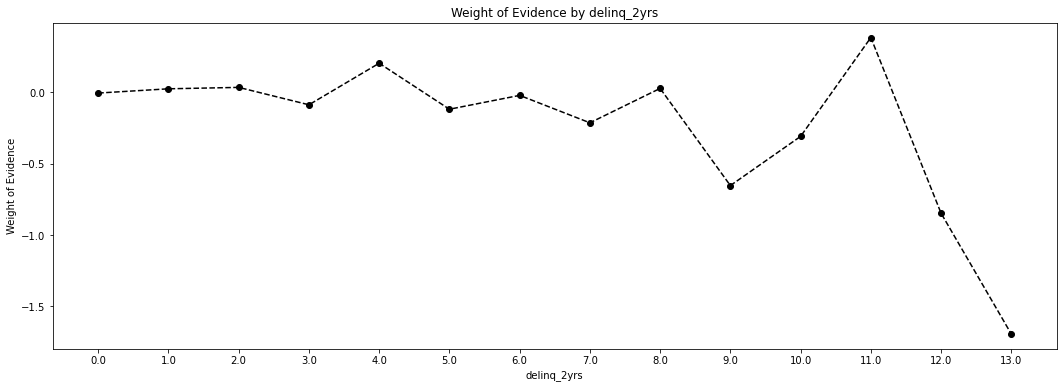

In [3203]:
plot_by_WoE(df_temp)

In [3204]:
df_inputs_prepr['delinq_2yrs:0']=np.where((df_inputs_prepr['delinq_2yrs']==0),1,0)
df_inputs_prepr['delinq_2yrs:1-4']=np.where((df_inputs_prepr['delinq_2yrs']>=1) & (df_inputs_prepr['delinq_2yrs']<=4),1,0)
df_inputs_prepr['delinq_2yrs:>4']=np.where((df_inputs_prepr['delinq_2yrs']>4),1,0)

In [3205]:
df_inputs_prepr['inq_last_6mths_factor']=pd.cut(df_inputs_prepr['inq_last_6mths'],50)

In [3206]:
df_temp=woe_ordered_continuous(df_inputs_prepr,'inq_last_6mths',df_targets_prepr)
df_temp

/Users/shankar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/shankar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


inq_last_6mths  no_ops  prop_good  prop_n_obs   n_good   n_bad  \
0              0.0   48289   0.909213    0.517806  43905.0  4384.0   
1              1.0   26053   0.885234    0.279368  23063.0  2990.0   
2              2.0   11491   0.861022    0.123219   9894.0  1597.0   
3              3.0    5090   0.844794    0.054580   4300.0   790.0   
4              4.0    1478   0.845061    0.015849   1249.0   229.0   
5              5.0     540   0.829630    0.005790    448.0    92.0   
6              6.0     227   0.748899    0.002434    170.0    57.0   
7              7.0      32   0.593750    0.000343     19.0    13.0   
8              8.0      26   0.461538    0.000279     12.0    14.0   
9              9.0      12   0.583333    0.000129      7.0     5.0   
10            10.0       3   1.000000    0.000032      3.0     0.0   
11            11.0       4   0.500000    0.000043      2.0     2.0   
12            12.0       2   1.000000    0.000021      2.0     0.0   
13            13.0       1   1.000000    0.000011      1.0     0.0   
14            14.0       1   0.000000    0.000011      0.0     1.0   
15            15.0       3   0.666667    0.000032      2.0     1.0   
16            17.0       1   0.000000    0.000011      0.0     1.0   
17            19.0       2   1.000000    0.000021      2.0     0.0   
18            31.0       1   1.000000    0.000011      1.0     0.0   
19            33.0       1   0.000000    0.000011      0.0     1.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  \
0      0.528467    0.430775  0.204393             NaN       NaN   
1      0.277600    0.293800 -0.056718        0.023979  0.261110   
2      0.119090    0.156922 -0.275872        0.024212  0.219155   
3      0.051757    0.077626 -0.405336        0.016228  0.129464   
4      0.015034    0.022502 -0.403297        0.000267  0.002039   
5      0.005392    0.009040 -0.516669        0.015431  0.113372   
6      0.002046    0.005601 -1.006927        0.080731  0.490257   
7      0.000229    0.001277 -1.720184        0.155149  0.713258   
8      0.000144    0.001376 -2.253824        0.132212  0.533640   
9      0.000084    0.000491 -1.763201        0.121795  0.490623   
10     0.000036    0.000000       inf        0.416667       inf   
11     0.000024    0.000197 -2.099674        0.500000       inf   
12     0.000024    0.000000       inf        0.500000       inf   
13     0.000012    0.000000       inf        0.000000       NaN   
14     0.000000    0.000098      -inf        1.000000       inf   
15     0.000024    0.000098 -1.406527        0.666667       inf   
16     0.000000    0.000098      -inf        0.666667       inf   
17     0.000024    0.000000       inf        1.000000       inf   
18     0.000012    0.000000       inf        0.000000       NaN   
19     0.000000    0.000098      -inf        1.000000       inf   

    Information Value  Information_Value  
0            0.019967                inf  
1            0.000919                inf  
2            0.010437                inf  
3            0.010486                inf  
4            0.003012                inf  
5            0.001885                inf  
6            0.003579                inf  
7            0.001804                inf  
8            0.002775                inf  
9            0.000718                inf  
10                inf                inf  
11           0.000362                inf  
12                inf                inf  
13                inf                inf  
14                inf                inf  
15           0.000104                inf  
16                inf                inf  
17                inf                inf  
18                inf                inf  
19                inf                inf

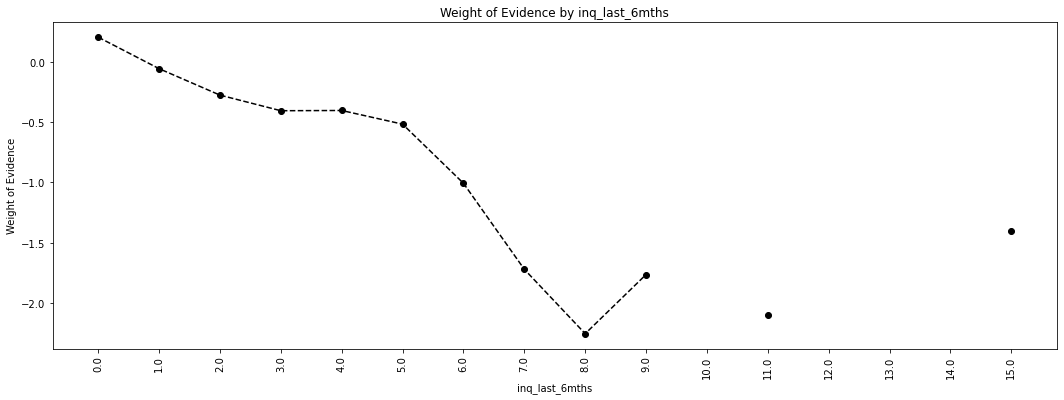

In [3207]:
plot_by_WoE(df_temp,90)

In [3208]:
df_inputs_prepr['inq_last_6mths:0']=np.where((df_inputs_prepr['inq_last_6mths']==0),1,0)
df_inputs_prepr['inq_last_6mths:1']=np.where((df_inputs_prepr['inq_last_6mths']==1),1,0)
df_inputs_prepr['inq_last_6mths:2-9']=np.where((df_inputs_prepr['inq_last_6mths']).isin(range(2,10)),1,0)
df_inputs_prepr['inq_last_6mths:>9']=np.where((df_inputs_prepr['inq_last_6mths']>9),1,0)

In [3209]:
df_inputs_prepr['open_acc_factor']=pd.cut(df_inputs_prepr['open_acc'],50)

In [3210]:
df_temp=woe_ordered_continuous(df_inputs_prepr,'open_acc',df_targets_prepr)
df_temp

/Users/shankar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/shankar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


open_acc  no_ops  prop_good  prop_n_obs  n_good   n_bad  prop_n_good  \
0        0.0       3   0.333333    0.000032     1.0     2.0     0.000012   
1        1.0      32   0.843750    0.000343    27.0     5.0     0.000325   
2        2.0     373   0.847185    0.004000   316.0    57.0     0.003804   
3        3.0    1131   0.862069    0.012128   975.0   156.0     0.011736   
4        4.0    2517   0.886770    0.026990  2232.0   285.0     0.026866   
5        5.0    4274   0.888863    0.045830  3799.0   475.0     0.045727   
6        6.0    6129   0.899984    0.065722  5516.0   613.0     0.066394   
7        7.0    7423   0.895999    0.079597  6651.0   772.0     0.080055   
8        8.0    8383   0.896099    0.089891  7512.0   871.0     0.090419   
9        9.0    8896   0.884780    0.095392  7871.0  1025.0     0.094740   
10      10.0    8607   0.884396    0.092293  7612.0   995.0     0.091623   
11      11.0    7745   0.885862    0.083050  6861.0   884.0     0.082583   
12      12.0    6918   0.892599    0.074182  6175.0   743.0     0.074326   
13      13.0    6017   0.895961    0.064521  5391.0   626.0     0.064889   
14      14.0    4999   0.884577    0.053605  4422.0   577.0     0.053226   
15      15.0    4085   0.895716    0.043804  3659.0   426.0     0.044042   
16      16.0    3297   0.898999    0.035354  2964.0   333.0     0.035676   
17      17.0    2638   0.888552    0.028287  2344.0   294.0     0.028214   
18      18.0    2162   0.896855    0.023183  1939.0   223.0     0.023339   
19      19.0    1736   0.890553    0.018615  1546.0   190.0     0.018609   
20      20.0    1320   0.900000    0.014154  1188.0   132.0     0.014299   
21      21.0    1055   0.891943    0.011313   941.0   114.0     0.011326   
22      22.0     840   0.879762    0.009007   739.0   101.0     0.008895   
23      23.0     610   0.883607    0.006541   539.0    71.0     0.006488   
24      24.0     467   0.862955    0.005008   403.0    64.0     0.004851   
25      25.0     399   0.914787    0.004278   365.0    34.0     0.004393   
26      26.0     266   0.917293    0.002852   244.0    22.0     0.002937   
27      27.0     203   0.911330    0.002177   185.0    18.0     0.002227   
28      28.0     134   0.888060    0.001437   119.0    15.0     0.001432   
29      29.0     127   0.850394    0.001362   108.0    19.0     0.001300   
30      30.0      92   0.913043    0.000987    84.0     8.0     0.001011   
31      31.0      66   0.924242    0.000708    61.0     5.0     0.000734   
32      32.0      58   0.931034    0.000622    54.0     4.0     0.000650   
33      33.0      45   0.911111    0.000483    41.0     4.0     0.000494   
34      34.0      38   1.000000    0.000407    38.0     0.0     0.000457   
35      35.0      48   0.937500    0.000515    45.0     3.0     0.000542   
36      36.0      34   0.911765    0.000365    31.0     3.0     0.000373   
37      37.0      20   0.900000    0.000214    18.0     2.0     0.000217   
38      38.0      17   0.882353    0.000182    15.0     2.0     0.000181   
39      39.0      15   1.000000    0.000161    15.0     0.0     0.000181   
40      40.0       4   0.750000    0.000043     3.0     1.0     0.000036   
41      41.0       7   1.000000    0.000075     7.0     0.0     0.000084   
42      42.0       5   1.000000    0.000054     5.0     0.0     0.000060   
43      43.0       2   1.000000    0.000021     2.0     0.0     0.000024   
44      44.0       4   1.000000    0.000043     4.0     0.0     0.000048   
45      45.0       3   0.666667    0.000032     2.0     1.0     0.000024   
46      47.0       3   0.666667    0.000032     2.0     1.0     0.000024   
47      48.0       3   1.000000    0.000032     3.0     0.0     0.000036   
48      49.0       2   1.000000    0.000021     2.0     0.0     0.000024   
49      50.0       1   1.000000    0.000011     1.0     0.0     0.000012   
50      53.0       1   1.000000    0.000011     1.0     0.0     0.000012   
51      55.0       1   1.000000    0.000011     1.0 

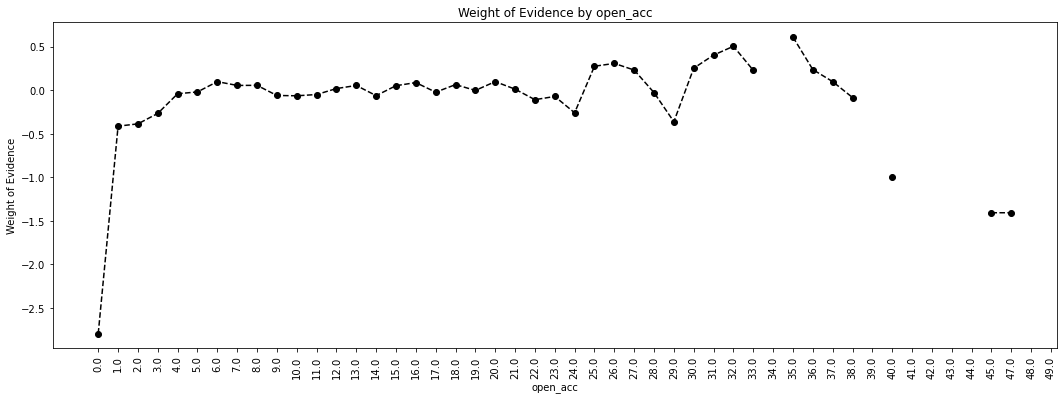

In [3211]:
plot_by_WoE(df_temp,90)

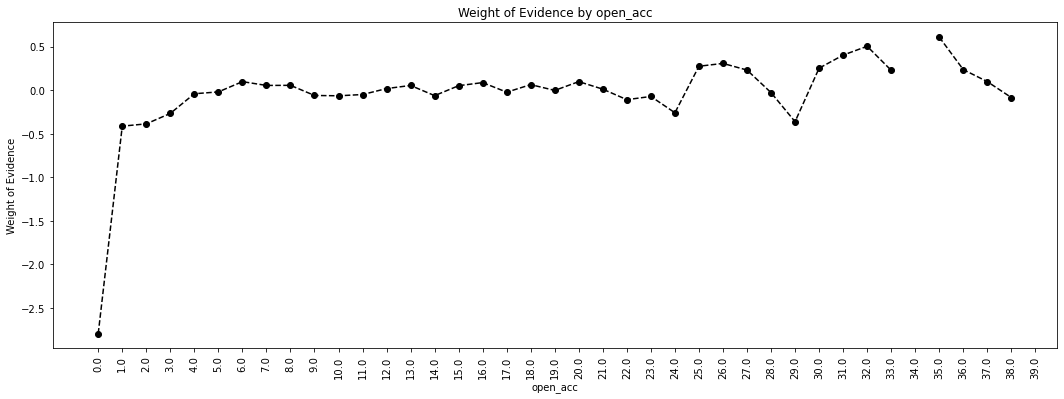

In [3212]:
plot_by_WoE(df_temp.iloc[ : 40, :], 90)

In [3213]:
df_inputs_prepr['open_acc:0-3']=np.where((df_inputs_prepr['open_acc']>=0) & (df_inputs_prepr['open_acc']<=3),1,0)
df_inputs_prepr['open_acc:4-12']=np.where((df_inputs_prepr['open_acc']>=4) & (df_inputs_prepr['open_acc']<=12),1,0)
df_inputs_prepr['open_acc:13-15']=np.where((df_inputs_prepr['open_acc']>=13) & (df_inputs_prepr['open_acc']<=15),1,0)
df_inputs_prepr['open_acc:16-22']=np.where((df_inputs_prepr['open_acc']>=16) & (df_inputs_prepr['open_acc']<=22),1,0)
df_inputs_prepr['open_acc:23-27']=np.where((df_inputs_prepr['open_acc']>=23) & (df_inputs_prepr['open_acc']<=27),1,0)
df_inputs_prepr['open_acc:>28']=np.where((df_inputs_prepr['open_acc']>28),1,0)

In [3214]:
df_temp=woe_ordered_continuous(df_inputs_prepr,'pub_rec',df_targets_prepr)
df_temp

/Users/shankar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


pub_rec  no_ops  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0       0.0   80929   0.889916    0.867806  72020.0  8909.0     0.866875   
1       1.0   10627   0.895361    0.113954   9515.0  1112.0     0.114528   
2       2.0    1182   0.906937    0.012675   1072.0   110.0     0.012903   
3       3.0     309   0.919094    0.003313    284.0    25.0     0.003418   
4       4.0     111   0.918919    0.001190    102.0     9.0     0.001228   
5       5.0      50   0.880000    0.000536     44.0     6.0     0.000530   
6       6.0      24   0.916667    0.000257     22.0     2.0     0.000265   
7       7.0      10   0.800000    0.000107      8.0     2.0     0.000096   
8       8.0       5   0.800000    0.000054      4.0     1.0     0.000048   
9       9.0       2   0.500000    0.000021      1.0     1.0     0.000012   
10     10.0       4   1.000000    0.000043      4.0     0.0     0.000048   
11     11.0       2   1.000000    0.000021      2.0     0.0     0.000024   
12     13.0       1   1.000000    0.000011      1.0     0.0     0.000012   
13     21.0       1   1.000000    0.000011      1.0     0.0     0.000012   

    prop_n_bad       WoE  diff_prop_good  diff_WoE  Information Value  \
0     0.875405 -0.009792             NaN       NaN           0.000084   
1     0.109266  0.047036        0.005445  0.056827           0.000248   
2     0.010809  0.177127        0.011577  0.130092           0.000371   
3     0.002457  0.330425        0.012156  0.153297           0.000318   
4     0.000884  0.328075        0.000175  0.002350           0.000113   
5     0.000590 -0.107244        0.038919  0.435318           0.000006   
6     0.000197  0.298222        0.036667  0.405465           0.000020   
7     0.000197 -0.713379        0.116667  1.011601           0.000072   
8     0.000098 -0.713379        0.000000  0.000000           0.000036   
9     0.000098 -2.099674        0.300000  1.386294           0.000181   
10    0.000000       inf        0.500000       inf                inf   
11    0.000000       inf        0.000000       NaN                inf   
12    0.000000       inf        0.000000       NaN                inf   
13    0.000000       inf        0.000000       NaN                inf   

    Information_Value  
0                 inf  
1                 inf  
2                 inf  
3                 inf  
4                 inf  
5                 inf  
6                 inf  
7                 inf  
8                 inf  
9                 inf  
10                inf  
11                inf  
12                inf  
13                inf

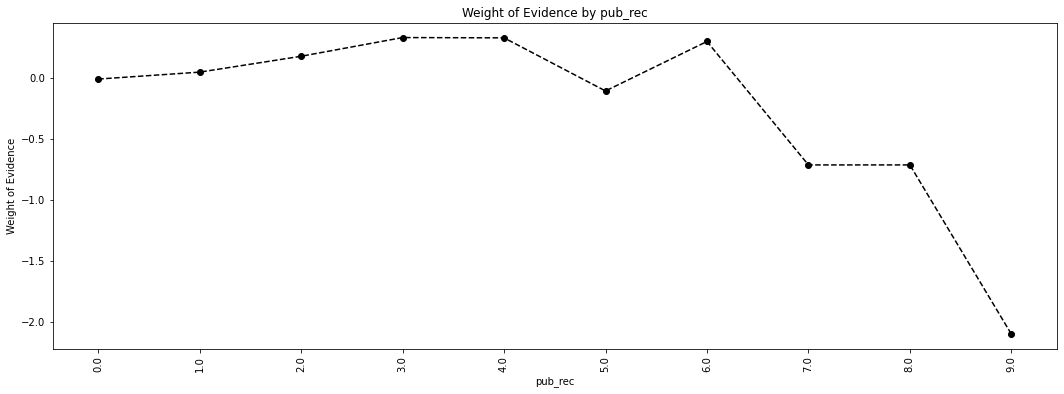

In [3215]:
plot_by_WoE(df_temp,90)

In [3216]:
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

In [3217]:
df_inputs_prepr['total_acc_factor']=pd.cut(df_inputs_prepr['total_acc'],60)
df_inputs_prepr['total_acc'].unique()

array([ 13.,  18.,   7.,  10.,  40.,  46.,  31.,  19.,  20.,  25.,  36.,
        23.,  37.,  17.,  47.,  28.,  30.,  15.,  14.,   8.,  45.,  26.,
        29.,  27.,  51.,   6.,   9.,  32.,  48.,  35.,  16.,  52.,  21.,
        24.,  22.,  12.,  11.,  39.,  41.,  50.,  38.,  58.,  34.,  33.,
        57.,  49.,  42.,   4.,   5.,  44.,   3.,  72.,  81.,  59.,  43.,
        63.,  71.,  65.,  53.,   2.,  56.,  60.,  67.,  54.,  55.,  69.,
        62.,  80.,  74.,  61., 105.,  64.,  76.,  73.,  70., 119.,  75.,
        66.,  77.,  68.,  95.,   1.,  90.,  79.,  91.,  99.,  84.,  89.,
        83.,   0.,  88.,  86., 100.,  93.,  92., 102.,  78.,  98.])

In [3218]:
df_temp=woe_ordered_continuous(df_inputs_prepr,'total_acc_factor',df_targets_prepr)
df_temp

/Users/shankar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


total_acc_factor  no_ops  prop_good  prop_n_obs  n_good  n_bad  \
0      (-0.119, 1.983]       7   0.857143    0.000075     6.0    1.0   
1       (1.983, 3.967]      97   0.752577    0.001040    73.0   24.0   
2        (3.967, 5.95]     780   0.851282    0.008364   664.0  116.0   
3        (5.95, 7.933]    1699   0.862861    0.018218  1466.0  233.0   
4       (7.933, 9.917]    2818   0.874734    0.030218  2465.0  353.0   
5        (9.917, 11.9]    3879   0.884506    0.041595  3431.0  448.0   
6       (11.9, 13.883]    4906   0.884020    0.052607  4337.0  569.0   
7     (13.883, 15.867]    5757   0.885878    0.061733  5100.0  657.0   
8      (15.867, 17.85]    6450   0.883721    0.069164  5700.0  750.0   
9      (17.85, 19.833]    6699   0.890133    0.071834  5963.0  736.0   
10    (19.833, 21.817]    6929   0.892337    0.074300  6183.0  746.0   
11      (21.817, 23.8]    6647   0.890326    0.071276  5918.0  729.0   
12      (23.8, 25.783]    6455   0.886754    0.069217  5724.0  731.0   
13    (25.783, 27.767]    5974   0.903750    0.064060  5399.0  575.0   
14     (27.767, 29.75]    5351   0.894225    0.057379  4785.0  566.0   
15     (29.75, 31.733]    4811   0.895032    0.051589  4306.0  505.0   
16    (31.733, 33.717]    4169   0.893020    0.044704  3723.0  446.0   
17      (33.717, 35.7]    3584   0.900670    0.038431  3228.0  356.0   
18      (35.7, 37.683]    3132   0.893359    0.033585  2798.0  334.0   
19    (37.683, 39.667]    2522   0.908406    0.027044  2291.0  231.0   
20     (39.667, 41.65]    2138   0.903648    0.022926  1932.0  206.0   
21     (41.65, 43.633]    1733   0.893249    0.018583  1548.0  185.0   
22    (43.633, 45.617]    1447   0.890809    0.015516  1289.0  158.0   
23      (45.617, 47.6]    1146   0.890052    0.012289  1020.0  126.0   
24      (47.6, 49.583]     883   0.899207    0.009468   794.0   89.0   
25    (49.583, 51.567]     745   0.906040    0.007989   675.0   70.0   
26     (51.567, 53.55]     576   0.904514    0.006176   521.0   55.0   
27     (53.55, 55.533]     452   0.898230    0.004847   406.0   46.0   
28    (55.533, 57.517]     314   0.898089    0.003367   282.0   32.0   
29      (57.517, 59.5]     283   0.922261    0.003035   261.0   22.0   
30      (59.5, 61.483]     225   0.920000    0.002413   207.0   18.0   
31    (61.483, 63.467]     405   0.891358    0.004343   361.0   44.0   
32     (63.467, 65.45]      57   0.912281    0.000611    52.0    5.0   
33     (65.45, 67.433]      40   0.950000    0.000429    38.0    2.0   
34    (67.433, 69.417]      36   0.888889    0.000386    32.0    4.0   
35      (69.417, 71.4]      18   0.944444    0.000193    17.0    1.0   
36      (71.4, 73.383]      16   1.000000    0.000172    16.0    0.0   
37    (73.383, 75.367]      20   1.000000    0.000214    20.0    0.0   
38     (75.367, 77.35]      15   0.866667    0.000161    13.0    2.0   
39     (77.35, 79.333]       6   0.833333    0.000064     5.0    1.0   
40    (79.333, 81.317]      11   0.909091    0.000118    10.0    1.0   
41      (81.317, 83.3]       1   1.000000    0.000011     1.0    0.0   
42      (83.3, 85.283]       2   1.000000    0.000021     2.0    0.0   
43    (85.283, 87.267]       2   0.500000    0.000021     1.0    1.0   
44     (87.267, 89.25]       3   0.666667    0.000032     2.0    1.0   
45     (89.25, 91.233]       4   1.000000    0.000043     4.0    0.0   
46    (91.233, 93.217]       3   0.666667    0.000032     2.0    1.0   
47      (93.217, 95.2]       2   1.000000    0.000021     2.0    0.0   
48      (95.2, 97.183]       0        NaN    0.000000     NaN    NaN   
49    (97.183, 99.167]       2   0.500000    0.000021     1.0    1.0   
50    (99.167, 101.15]       1   1.000000    0.000011     1.0    0.0   
51   (101.15, 103.133]       1   1.000000    0.000011     1.0    0.0   
52  (103.133, 105.117]       3   1.000000    0.000032     3.0    0.0   
53    (105.117, 107.1]       0        NaN    0.000000     NaN    NaN   
54    (107.1, 109.083]       0        NaN    0

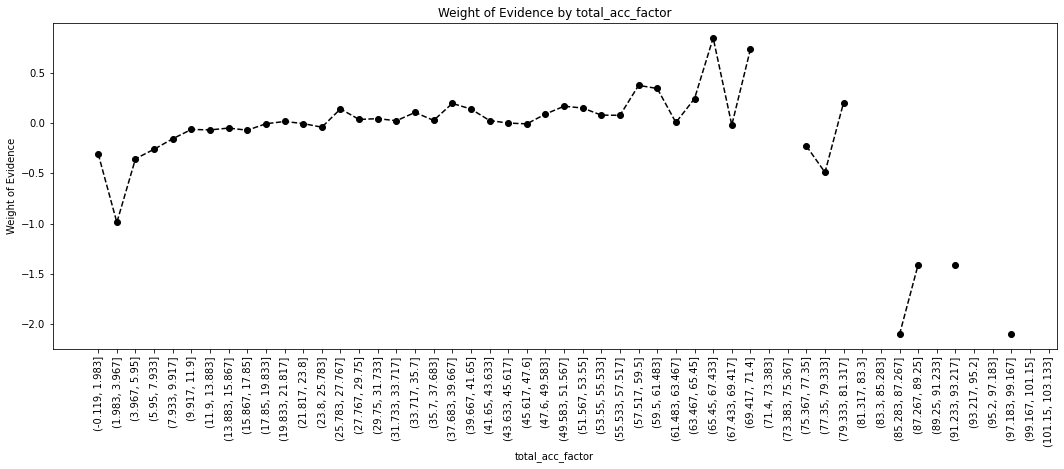

In [3219]:
plot_by_WoE(df_temp,90)

In [3220]:
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

In [3221]:
df_temp=woe_ordered_continuous(df_inputs_prepr,'acc_now_delinq',df_targets_prepr)
df_temp

/Users/shankar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


acc_now_delinq  no_ops  prop_good  prop_n_obs   n_good    n_bad  \
0             0.0   92924   0.890771    0.996429  82774.0  10150.0   
1             1.0     310   0.922581    0.003324    286.0     24.0   
2             2.0      19   0.842105    0.000204     16.0      3.0   
3             3.0       2   1.000000    0.000021      2.0      0.0   
4             4.0       1   1.000000    0.000011      1.0      0.0   
5             5.0       1   1.000000    0.000011      1.0      0.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  \
0     0.996317    0.997347 -0.001033             NaN       NaN   
1     0.003442    0.002358  0.378264        0.031810  0.379298   
2     0.000193    0.000295 -0.425697        0.080475  0.803962   
3     0.000024    0.000000       inf        0.157895       inf   
4     0.000012    0.000000       inf        0.000000       NaN   
5     0.000012    0.000000       inf        0.000000       NaN   

   Information Value  Information_Value  
0           0.000001                inf  
1           0.000410                inf  
2           0.000044                inf  
3                inf                inf  
4                inf                inf  
5                inf                inf

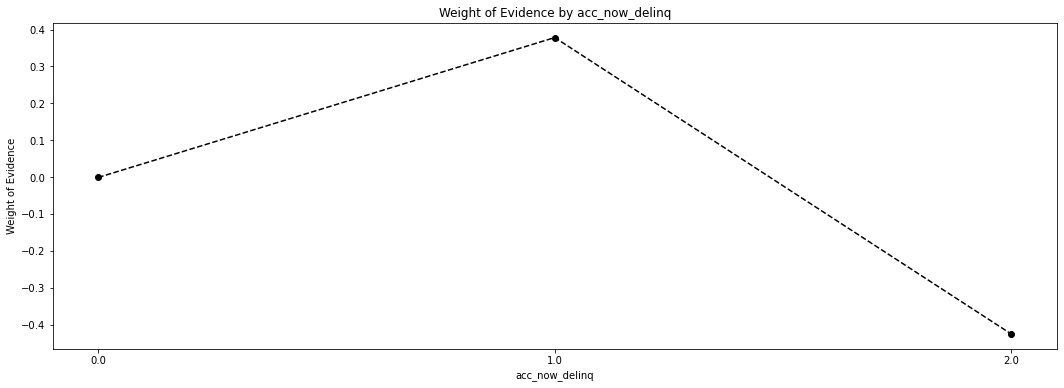

In [3222]:
plot_by_WoE(df_temp)

In [3223]:
df_inputs_prepr['annual_inc_factor']=pd.cut(df_inputs_prepr['annual_inc'],50)
df_temp=woe_ordered_continuous(df_inputs_prepr,'annual_inc_factor',df_targets_prepr)
df_temp

/Users/shankar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


annual_inc_factor  no_ops  prop_good  prop_n_obs   n_good   n_bad  \
0       (-956.477, 94729.54]   73601   0.882882    0.789228  64981.0  8620.0   
1      (94729.54, 185859.08]   17539   0.919266    0.188072  16123.0  1416.0   
2     (185859.08, 276988.62]    1568   0.934949    0.016814   1466.0   102.0   
3     (276988.62, 368118.16]     321   0.937695    0.003442    301.0    20.0   
4      (368118.16, 459247.7]     104   0.913462    0.001115     95.0     9.0   
5      (459247.7, 550377.24]      51   0.901961    0.000547     46.0     5.0   
6     (550377.24, 641506.78]      23   0.826087    0.000247     19.0     4.0   
7     (641506.78, 732636.32]      18   1.000000    0.000193     18.0     0.0   
8     (732636.32, 823765.86]       8   0.875000    0.000086      7.0     1.0   
9      (823765.86, 914895.4]       8   1.000000    0.000086      8.0     0.0   
10    (914895.4, 1006024.94]       6   1.000000    0.000064      6.0     0.0   
11  (1006024.94, 1097154.48]       2   1.000000    0.000021      2.0     0.0   
12  (1097154.48, 1188284.02]       0        NaN    0.000000      NaN     NaN   
13  (1188284.02, 1279413.56]       3   1.000000    0.000032      3.0     0.0   
14   (1279413.56, 1370543.1]       1   1.000000    0.000011      1.0     0.0   
15   (1370543.1, 1461672.64]       1   1.000000    0.000011      1.0     0.0   
16  (1461672.64, 1552802.18]       0        NaN    0.000000      NaN     NaN   
17  (1552802.18, 1643931.72]       0        NaN    0.000000      NaN     NaN   
18  (1643931.72, 1735061.26]       0        NaN    0.000000      NaN     NaN   
19   (1735061.26, 1826190.8]       1   1.000000    0.000011      1.0     0.0   
20   (1826190.8, 1917320.34]       0        NaN    0.000000      NaN     NaN   
21  (1917320.34, 2008449.88]       0        NaN    0.000000      NaN     NaN   
22  (2008449.88, 2099579.42]       0        NaN    0.000000      NaN     NaN   
23  (2099579.42, 2190708.96]       0        NaN    0.000000      NaN     NaN   
24   (2190708.96, 2281838.5]       0        NaN    0.000000      NaN     NaN   
25   (2281838.5, 2372968.04]       0        NaN    0.000000      NaN     NaN   
26  (2372968.04, 2464097.58]       0        NaN    0.000000      NaN     NaN   
27  (2464097.58, 2555227.12]       0        NaN    0.000000      NaN     NaN   
28  (2555227.12, 2646356.66]       0        NaN    0.000000      NaN     NaN   
29   (2646356.66, 2737486.2]       0        NaN    0.000000      NaN     NaN   
30   (2737486.2, 2828615.74]       0        NaN    0.000000      NaN     NaN   
31  (2828615.74, 2919745.28]       0        NaN    0.000000      NaN     NaN   
32  (2919745.28, 3010874.82]       0        NaN    0.000000      NaN     NaN   
33  (3010874.82, 3102004.36]       0        NaN    0.000000      NaN     NaN   
34   (3102004.36, 3193133.9]       0        NaN    0.000000      NaN     NaN   
35   (3193133.9, 3284263.44]       0        NaN    0.000000      NaN     NaN   
36  (3284263.44, 3375392.98]       0        NaN    0.000000      NaN     NaN   
37  (3375392.98, 3466522.52]       0        NaN    0.000000      NaN     NaN   
38  (3466522.52, 3557652.06]       0        NaN    0.000000      NaN     NaN   
39   (3557652.06, 3648781.6]       0        NaN    0.000000      NaN     NaN   
40   (3648781.6, 3739911.14]       0        NaN    0.000000      NaN     NaN   
41  (3739911.14, 3831040.68]       0        NaN    0.000000      NaN     NaN   
42  (3831040.68, 3922170.22]       1   1.000000    0.000011      1.0     0.0   
43  (3922170.22, 4013299.76]       0        NaN    0.000000      NaN     NaN   
44   (4013299.76, 4104429.3]       0        NaN    0.000000      NaN     NaN   
45   (4104429.3, 4195558.84]       0        NaN    0.000000      NaN     NaN   
46  (4195558.84, 4286688.38]       0        NaN    0.000000      NaN     NaN   
47  (4286688.38, 4377817.92]       0        NaN    0.000000      NaN     NaN   
48  (4377817.92, 4468947.46]       0        NaN    0.000000      NaN     NaN   
49   (44689

In [3224]:
df_inputs_prepr['annual_inc_factor']=pd.cut(df_inputs_prepr['annual_inc'],100)
df_temp=woe_ordered_continuous(df_inputs_prepr,'annual_inc_factor',df_targets_prepr)
df_temp

/Users/shankar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


annual_inc_factor  no_ops  prop_good  prop_n_obs   n_good   n_bad  \
0       (-956.477, 49164.77]   28029   0.864034    0.300557  24218.0  3811.0   
1       (49164.77, 94729.54]   45572   0.894475    0.488671  40763.0  4809.0   
2      (94729.54, 140294.31]   14178   0.918395    0.152031  13021.0  1157.0   
3     (140294.31, 185859.08]    3361   0.922940    0.036040   3102.0   259.0   
4     (185859.08, 231423.85]    1106   0.934901    0.011860   1034.0    72.0   
5     (231423.85, 276988.62]     462   0.935065    0.004954    432.0    30.0   
6     (276988.62, 322553.39]     203   0.935961    0.002177    190.0    13.0   
7     (322553.39, 368118.16]     118   0.940678    0.001265    111.0     7.0   
8     (368118.16, 413682.93]      71   0.901408    0.000761     64.0     7.0   
9      (413682.93, 459247.7]      33   0.939394    0.000354     31.0     2.0   
10     (459247.7, 504812.47]      36   0.916667    0.000386     33.0     3.0   
11    (504812.47, 550377.24]      15   0.866667    0.000161     13.0     2.0   
12    (550377.24, 595942.01]       6   1.000000    0.000064      6.0     0.0   
13    (595942.01, 641506.78]      17   0.764706    0.000182     13.0     4.0   
14    (641506.78, 687071.55]      10   1.000000    0.000107     10.0     0.0   
15    (687071.55, 732636.32]       8   1.000000    0.000086      8.0     0.0   
16    (732636.32, 778201.09]       4   0.750000    0.000043      3.0     1.0   
17    (778201.09, 823765.86]       4   1.000000    0.000043      4.0     0.0   
18    (823765.86, 869330.63]       7   1.000000    0.000075      7.0     0.0   
19     (869330.63, 914895.4]       1   1.000000    0.000011      1.0     0.0   
20     (914895.4, 960460.17]       2   1.000000    0.000021      2.0     0.0   
21   (960460.17, 1006024.94]       4   1.000000    0.000043      4.0     0.0   
22  (1006024.94, 1051589.71]       1   1.000000    0.000011      1.0     0.0   
23  (1051589.71, 1097154.48]       1   1.000000    0.000011      1.0     0.0   
24  (1097154.48, 1142719.25]       0        NaN    0.000000      NaN     NaN   
25  (1142719.25, 1188284.02]       0        NaN    0.000000      NaN     NaN   
26  (1188284.02, 1233848.79]       2   1.000000    0.000021      2.0     0.0   
27  (1233848.79, 1279413.56]       1   1.000000    0.000011      1.0     0.0   
28  (1279413.56, 1324978.33]       0        NaN    0.000000      NaN     NaN   
29   (1324978.33, 1370543.1]       1   1.000000    0.000011      1.0     0.0   
30   (1370543.1, 1416107.87]       1   1.000000    0.000011      1.0     0.0   
31  (1416107.87, 1461672.64]       0        NaN    0.000000      NaN     NaN   
32  (1461672.64, 1507237.41]       0        NaN    0.000000      NaN     NaN   
33  (1507237.41, 1552802.18]       0        NaN    0.000000      NaN     NaN   
34  (1552802.18, 1598366.95]       0        NaN    0.000000      NaN     NaN   
35  (1598366.95, 1643931.72]       0        NaN    0.000000      NaN     NaN   
36  (1643931.72, 1689496.49]       0        NaN    0.000000      NaN     NaN   
37  (1689496.49, 1735061.26]       0        NaN    0.000000      NaN     NaN   
38  (1735061.26, 1780626.03]       0        NaN    0.000000      NaN     NaN   
39   (1780626.03, 1826190.8]       1   1.000000    0.000011      1.0     0.0   
40   (1826190.8, 1871755.57]       0        NaN    0.000000      NaN     NaN   
41  (1871755.57, 1917320.34]       0        NaN    0.000000      NaN     NaN   
42  (1917320.34, 1962885.11]       0        NaN    0.000000      NaN     NaN   
43  (1962885.11, 2008449.88]       0        NaN    0.000000      NaN     NaN   
44  (2008449.88, 2054014.65]       0        NaN    0.000000      NaN     NaN   
45  (2054014.65, 2099579.42]       0        NaN    0.000000      NaN     NaN   
46  (2099579.42, 2145144.19]       0        NaN    0.000000      NaN     NaN   
47  (2145144.19, 2190708.96]       0        NaN    0.000000      NaN     NaN   
48  (2190708.96, 2236273.73]       0        NaN    0.000000      NaN     NaN   
49   (22362

In [3225]:
df_inputs_prepr_temp=df_inputs_prepr.loc[df_inputs_prepr['annual_inc']<=140000,:]

In [3226]:
df_inputs_prepr_temp['annual_inc_factor']=pd.cut(df_inputs_prepr_temp['annual_inc'],50)
df_temp=woe_ordered_continuous(df_inputs_prepr_temp,'annual_inc_factor',df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

<ipython-input-3226-df94ee9ed040>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['annual_inc_factor']=pd.cut(df_inputs_prepr_temp['annual_inc'],50)


annual_inc_factor  no_ops  prop_good  prop_n_obs  n_good  n_bad  \
0       (3463.6, 6328.0]       5   0.800000    0.000057     4.0    1.0   
1       (6328.0, 9056.0]      37   0.810811    0.000422    30.0    7.0   
2      (9056.0, 11784.0]     111   0.756757    0.001265    84.0   27.0   
3     (11784.0, 14512.0]     245   0.824490    0.002791   202.0   43.0   
4     (14512.0, 17240.0]     335   0.850746    0.003817   285.0   50.0   
5     (17240.0, 19968.0]     429   0.841492    0.004888   361.0   68.0   
6     (19968.0, 22696.0]     874   0.855835    0.009957   748.0  126.0   
7     (22696.0, 25424.0]    1554   0.859717    0.017705  1336.0  218.0   
8     (25424.0, 28152.0]    1373   0.847050    0.015642  1163.0  210.0   
9     (28152.0, 30880.0]    2155   0.863573    0.024552  1861.0  294.0   
10    (30880.0, 33608.0]    2113   0.859442    0.024073  1816.0  297.0   
11    (33608.0, 36336.0]    3371   0.861762    0.038405  2905.0  466.0   
12    (36336.0, 39064.0]    2333   0.879554    0.026580  2052.0  281.0   
13    (39064.0, 41792.0]    3734   0.863149    0.042541  3223.0  511.0   
14    (41792.0, 44520.0]    3142   0.867919    0.035796  2727.0  415.0   
15    (44520.0, 47248.0]    4110   0.871290    0.046825  3581.0  529.0   
16    (47248.0, 49976.0]    2355   0.871762    0.026830  2053.0  302.0   
17    (49976.0, 52704.0]    5555   0.881188    0.063288  4895.0  660.0   
18    (52704.0, 55432.0]    4222   0.883941    0.048101  3732.0  490.0   
19    (55432.0, 58160.0]    2559   0.885502    0.029154  2266.0  293.0   
20    (58160.0, 60888.0]    4410   0.876417    0.050243  3865.0  545.0   
21    (60888.0, 63616.0]    2251   0.899156    0.025645  2024.0  227.0   
22    (63616.0, 66344.0]    3840   0.894792    0.043749  3436.0  404.0   
23    (66344.0, 69072.0]    1917   0.903495    0.021840  1732.0  185.0   
24    (69072.0, 71800.0]    3212   0.883250    0.036594  2837.0  375.0   
25    (71800.0, 74528.0]    2088   0.896552    0.023788  1872.0  216.0   
26    (74528.0, 77256.0]    3303   0.904329    0.037631  2987.0  316.0   
27    (77256.0, 79984.0]    1148   0.887631    0.013079  1019.0  129.0   
28    (79984.0, 82712.0]    3445   0.903628    0.039249  3113.0  332.0   
29    (82712.0, 85440.0]    2554   0.906421    0.029097  2315.0  239.0   
30    (85440.0, 88168.0]    1113   0.920036    0.012680  1024.0   89.0   
31    (88168.0, 90896.0]    2314   0.919188    0.026363  2127.0  187.0   
32    (90896.0, 93624.0]    1104   0.936594    0.012578  1034.0   70.0   
33    (93624.0, 96352.0]    1731   0.917389    0.019721  1588.0  143.0   
34    (96352.0, 99080.0]     950   0.907368    0.010823   862.0   88.0   
35   (99080.0, 101808.0]    2089   0.914313    0.023800  1910.0  179.0   
36  (101808.0, 104536.0]     822   0.909976    0.009365   748.0   74.0   
37  (104536.0, 107264.0]    1079   0.927711    0.012293  1001.0   78.0   
38  (107264.0, 109992.0]     401   0.897756    0.004569   360.0   41.0   
39  (109992.0, 112720.0]    1447   0.905321    0.016486  1310.0  137.0   
40  (112720.0, 115448.0]     743   0.934051    0.008465   694.0   49.0   
41  (115448.0, 118176.0]     374   0.906417    0.004261   339.0   35.0   
42  (118176.0, 120904.0]    1456   0.918269    0.016588  1337.0  119.0   
43  (120904.0, 123632.0]     236   0.957627    0.002689   226.0   10.0   
44  (123632.0, 126360.0]     880   0.927273    0.010026   816.0   64.0   
45  (126360.0, 129088.0]     224   0.928571    0.002552   208.0   16.0   
46  (129088.0, 131816.0]     728   0.927198    0.008294   675.0   53.0   
47  (131816.0, 134544.0]     206   0.941748    0.002347   194.0   12.0   
48  (134544.0, 137272.0]     468   0.933761    0.005332   437.0   31.0   
49  (137272.0, 140000.0]     629   0.928458    0.007166   584.0   45.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  \
0      0.000051    0.000102 -0.690458             NaN       NaN   
1      0.000385    0.000716 -0.621466        0.010811  0.068993   
2      0.001077    0.002762 -0.

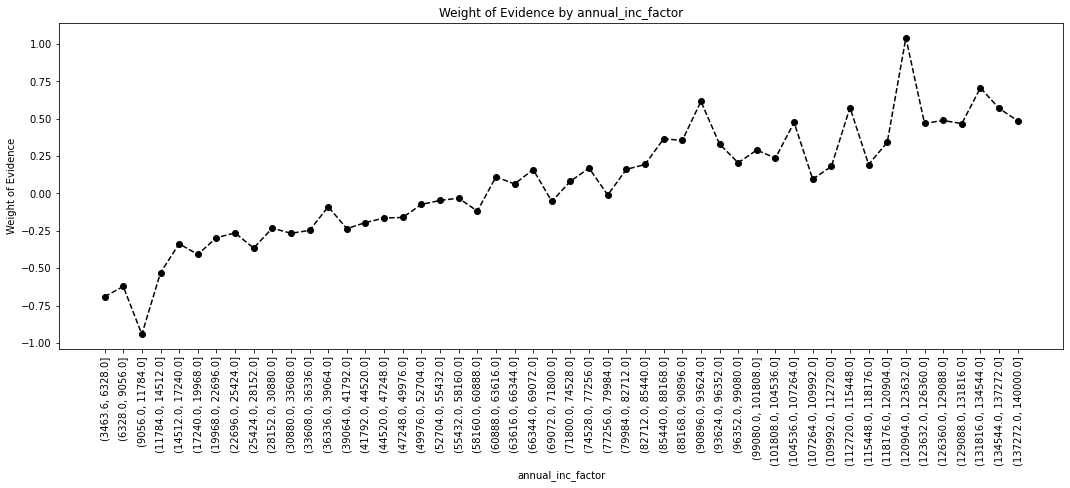

In [3227]:
plot_by_WoE(df_temp,90)

In [3228]:
df_inputs_prepr['annual_inc:<=20k'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20k-30k'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30k-40k'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40k-50k'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50k-60k'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60k-70k'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70k-80k'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80k-90k'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90k-100k'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100k-120k'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120k-140k'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140k'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

In [3229]:
#Missing dummy variables: 1:when the value is missing, 0:when the values is not missing
df_inputs_prepr_temp=df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor']=pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'],50)
df_temp=woe_ordered_continuous(df_inputs_prepr_temp,'mths_since_last_delinq_factor',df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

<ipython-input-3229-d840f9bcfaa7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_delinq_factor']=pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'],50)
/Users/shankar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/shankar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


mths_since_last_delinq_factor  no_ops  prop_good  prop_n_obs  n_good  \
0                 (-0.188, 3.76]    1336   0.883234    0.031009  1180.0   
1                   (3.76, 7.52]    2736   0.879751    0.063504  2407.0   
2                  (7.52, 11.28]    3299   0.889360    0.076571  2934.0   
3                 (11.28, 15.04]    3329   0.887354    0.077268  2954.0   
4                  (15.04, 18.8]    2372   0.893761    0.055055  2120.0   
5                  (18.8, 22.56]    2889   0.903427    0.067055  2610.0   
6                 (22.56, 26.32]    2723   0.889460    0.063202  2422.0   
7                 (26.32, 30.08]    2582   0.901627    0.059929  2328.0   
8                 (30.08, 33.84]    1866   0.907288    0.043311  1693.0   
9                  (33.84, 37.6]    2380   0.888235    0.055241  2114.0   
10                 (37.6, 41.36]    2344   0.891212    0.054405  2089.0   
11                (41.36, 45.12]    2355   0.891720    0.054661  2100.0   
12                (45.12, 48.88]    1623   0.895256    0.037671  1453.0   
13                (48.88, 52.64]    1602   0.892634    0.037183  1430.0   
14                 (52.64, 56.4]    1555   0.884887    0.036092  1376.0   
15                 (56.4, 60.16]    1398   0.909871    0.032448  1272.0   
16                (60.16, 63.92]    1040   0.885577    0.024139   921.0   
17                (63.92, 67.68]    1350   0.884444    0.031334  1194.0   
18                (67.68, 71.44]    1328   0.887801    0.030824  1179.0   
19                 (71.44, 75.2]    1210   0.889256    0.028085  1076.0   
20                 (75.2, 78.96]     818   0.900978    0.018986   737.0   
21                (78.96, 82.72]     877   0.872292    0.020356   765.0   
22                (82.72, 86.48]      30   0.733333    0.000696    22.0   
23                (86.48, 90.24]      12   1.000000    0.000279    12.0   
24                 (90.24, 94.0]       3   0.666667    0.000070     2.0   
25                 (94.0, 97.76]       5   1.000000    0.000116     5.0   
26               (97.76, 101.52]       9   1.000000    0.000209     9.0   
27              (101.52, 105.28]       2   1.000000    0.000046     2.0   
28              (105.28, 109.04]       1   1.000000    0.000023     1.0   
29               (109.04, 112.8]       0        NaN    0.000000     NaN   
30               (112.8, 116.56]       1   1.000000    0.000023     1.0   
31              (116.56, 120.32]       3   1.000000    0.000070     3.0   
32              (120.32, 124.08]       0        NaN    0.000000     NaN   
33              (124.08, 127.84]       0        NaN    0.000000     NaN   
34               (127.84, 131.6]       3   1.000000    0.000070     3.0   
35               (131.6, 135.36]       1   0.000000    0.000023     0.0   
36              (135.36, 139.12]       0        NaN    0.000000     NaN   
37              (139.12, 142.88]       0        NaN    0.000000     NaN   
38              (142.88, 146.64]       0        NaN    0.000000     NaN   
39               (146.64, 150.4]       0        NaN    0.000000     NaN   
40               (150.4, 154.16]       0        NaN    0.000000     NaN   
41              (154.16, 157.92]       1   1.000000    0.000023     1.0   
42              (157.92, 161.68]       0        NaN    0.000000     NaN   
43              (161.68, 165.44]       0        NaN    0.000000     NaN   
44               (165.44, 169.2]       0        NaN    0.000000     NaN   
45               (169.2, 172.96]       0        NaN    0.000000     NaN   
46              (172.96, 176.72]       0        NaN    0.000000     NaN   
47              (176.72, 180.48]       0        NaN    0.000000     NaN   
48              (180.48, 184.24]       0        NaN    0.000000     NaN   
49               (184.24, 188.0]       1   1.000000    0.000023     1.0   

    n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  \
0   156.0     0.030716    0.033419 -0.084330             NaN       NaN   
1   329.0     0.062656    0.0

In [3230]:
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq']>=0) & (df_inputs_prepr['mths_since_last_delinq']<3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq']>=4) & (df_inputs_prepr['mths_since_last_delinq']<=30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-57'] = np.where((df_inputs_prepr['mths_since_last_delinq']>=31) & (df_inputs_prepr['mths_since_last_delinq']<=57), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq']>=57),1,0)


# Pre Processing the Test Data

In [3231]:
#loan_data_inputs_train=df_inputs_prepr
loan_data_inputs_test=df_inputs_prepr

In [3232]:
loan_data_inputs_test

Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
406269      406269  14539347   16601647       6000         6000   
424213      424213  12826446   14848565       7125         7125   
9741          9741    844451    1055384       8000         8000   
5237          5237    988537    1212981       7500         7500   
104468      104468   6646726    8228876       2000         2000   
243414      243414  32409323   35022560      35000        35000   
143174      143174   3848787    4862436      20000        20000   
220073      220073   1241313    1481644       7200         7200   
295103      295103  29023950   31547150      10575        10575   
429549      429549  12626453   14688622       6600         6600   
20066        20066    663412     848304      25000        25000   
374777      374777  17815277   19947745      13000        13000   
6588          6588    966615    1187292       2100         2100   
346819      346819  21090728   23373407       5000         5000   
345265      345265  21330298   23643182      18825        18825   
278194      278194  31356782   33929985       8000         8000   
275985      275985  31577575   34170767      10200        10200   
323516      323516  23202952   25555875      28000        28000   
212264      212264   1351678    1595834      20000        20000   
35075        35075     69001     265533      15000        15000   
147007      147007   4310354    5492986       8325         8325   
459809      459809  10575254   12457355       2000         2000   
26643        26643    567109     729527       1500         1500   
237208      237208  36491003   39222788      10850        10850   
199210      199210   1519382    1782254       1500         1500   
39029        39029    292050     292040       9000         9000   
228748      228748   1104162    1340556      16000        16000   
107928      107928   6569374    8121404      15000        15000   
171492      171492   3150896    3863463      32000        32000   
443207      443207  11834809   13826960      30000        30000   
214842      214842   1327799    1572960      14900        14900   
371218      371218  18845567   21018147       6000         6000   
82526        82526   7628117    1194648      28200        28200   
190500      190500   1621205    1893176       5000         5000   
205660      205660   1443004    1695105      20000        20000   
209962      209962   1395972    1642754      30000        30000   
193391      193391   1566189    1833511       6400         6400   
334642      334642  22902598   25245555      24000        24000   
366553      366553  18925737   21178389      20000        20000   
383138      383138  17302827   19345368      20000        20000   
157721      157721   3665900    4629000       9000         9000   
40130        40130    576615     741549       2500         2500   
420577      420577  12245328   14237482      24125        24125   
163510      163510   3378873    4231649       6000         6000   
237467      237467  36341208   39072606      20000        20000   
51595        51595   9754723    4667499      16000        16000   
263086      263086  33310875   35954140       8000         8000   
38664        38664    350313     352342       7500         7500   
421711      421711  12988322   15020474       6700         6700   
227455      227455   1109059    1345488      11000        11000   
...            ...       ...        ...        ...          ...   
224056      224056   1179012    1420473      15000        15000   
437237      437237  12515429   14527574      24000        24000   
390390      390390  16261891   18364422      28000        28000   
45503        45503  10125547   11977659      12000        12000   
85965        85965   7439345    9101343      24925        24925   
87289        87289   7368529    9030532      22000        22000   
425325      425325  12936254   14968453      10000        10000   
200992      200992   1496553    1757339      24250     

In [ ]:
#loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
#loan_data_targets_train.to_csv('loan_data_targets_train.csv')
loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
loan_data_targets_test.to_csv('loan_data_targets_test.csv')